From Rxx, and Gideon, I learned about this applied SME signal boosting on quadradic funding. 

It means that the quadradic funding algorithm is weighted heavier from donors that qualify as SME.

Congrats to the TEC coordination team for pulling this off. They pulled this off on round 1.

Let's apply engineering to this process.

Engineering is about the production of artifacts in a safe and ethical way. 

Artifacts have interfaces that people may use. Engineering allows the usage of interfaces without bad things happening.



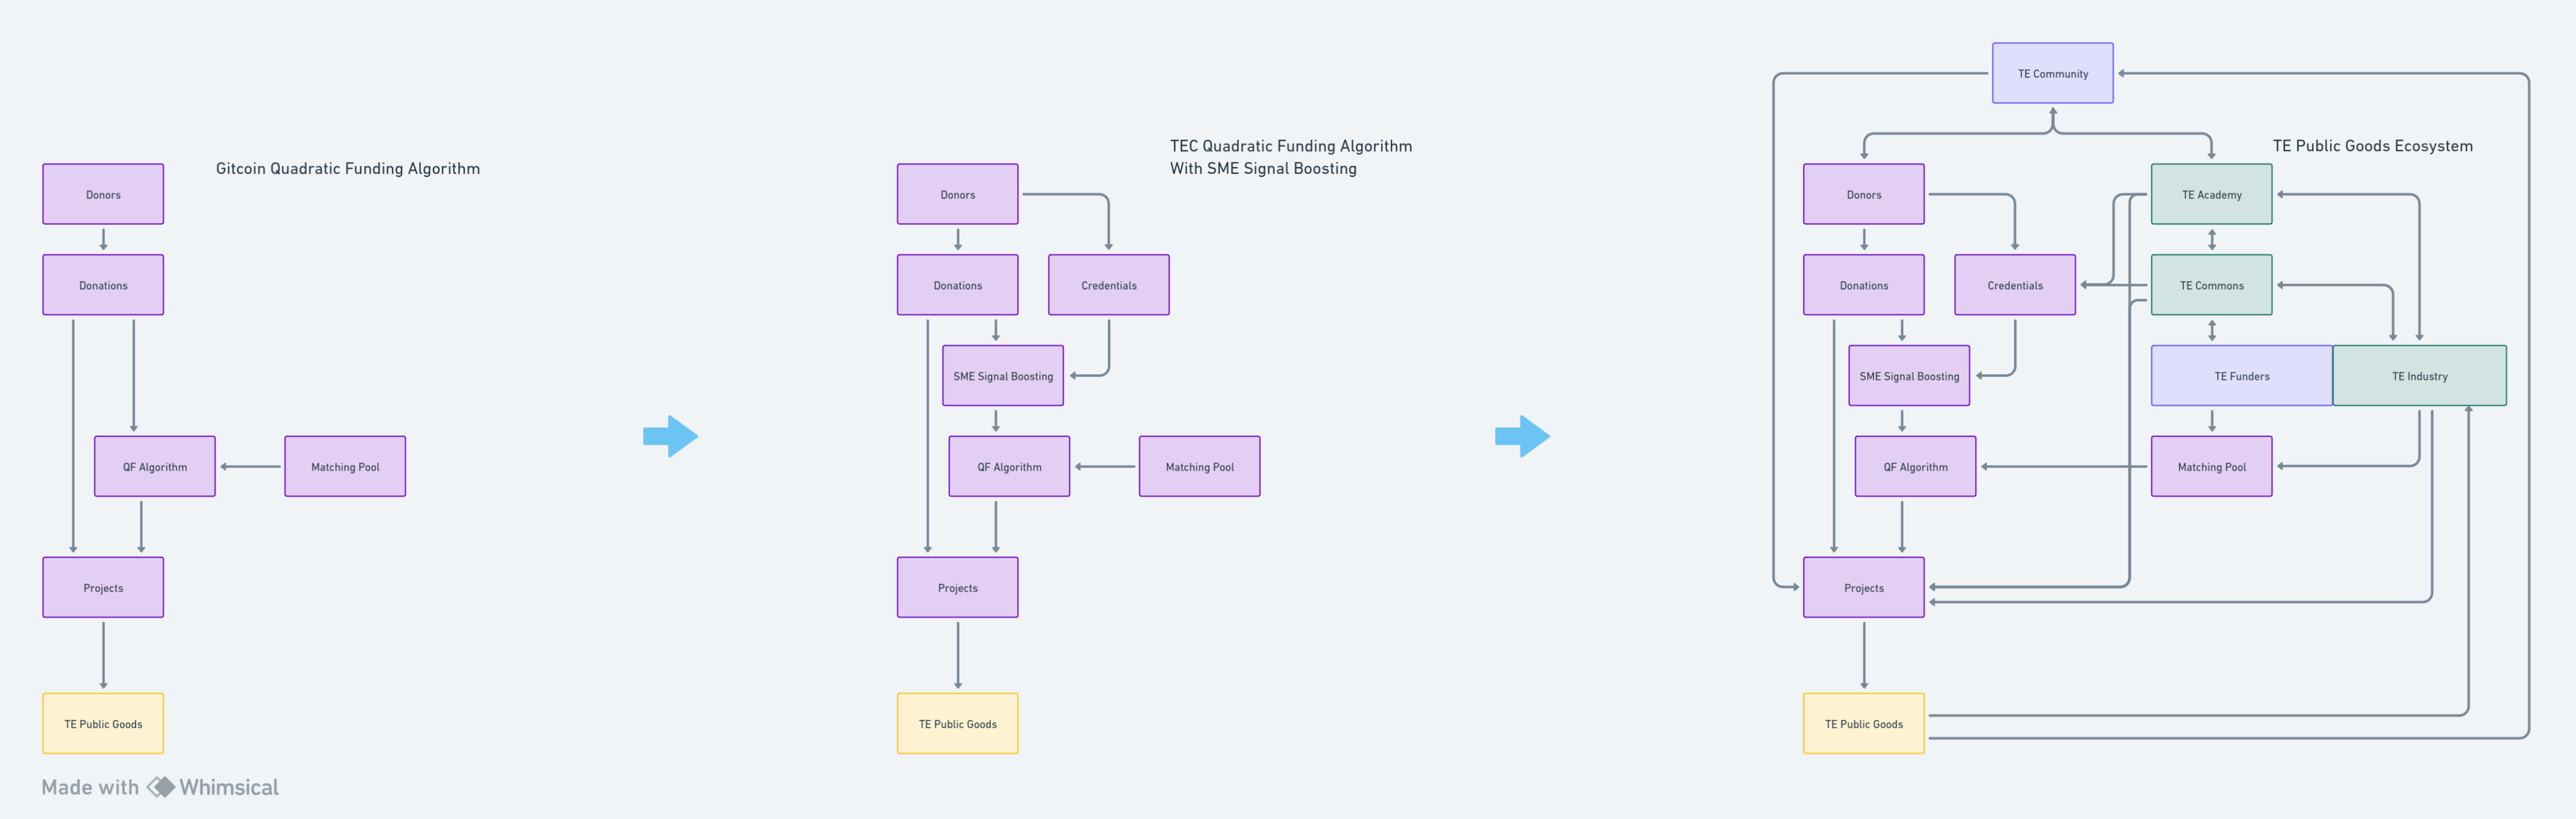![image.png]()

Link to the above board: https://whimsical.com/original-qfsme-mechanism-flowchart-QjXRdbkFmBcXBhnV175K9z 

Resources


* https://arxiv.org/pdf/2010.01193.pdf
* https://arxiv.org/pdf/1809.06421.pdf
* https://vitalik.ca/general/2019/12/07/quadratic.html
* https://qf.gitcoin.co/?grant=&grant=&grant=&match=1000
* https://medium.com/token-engineering-commons/expertise-and-quadratic-funding-bd4f0c5c3e23 

The following is a data science illustration of The foundational paper on FDFPGs. This is meant to be part one of a two part paper review, with a future modeling of Quadratic Funding and Matching Funds Requirments by Pasquini at Gitcoin. 

This worik is for educational purposes in the domain of token engineering. This work is meant to illustrate a data science approach to systems based modeling. This work is in the domain of digital signal processing, with primary foundations in machine learning, big data, data science, economics, and computing science, as those are the backgrounds of the primary authors. This work is funded by  with the Token Engineering Commons and Griff Green. 

# A Flexible Design for Funding Public Goods

Bhuterin, Hitzig, Weyl on A Flexible Design for Funding Public Goods. 

https://arxiv.org/pdf/1809.06421.pdf

The following is a data science illustration of The foundational paper on FDFPGs. This is meant to be part one of a two part paper review, with a future modeling of Quadratic Funding and Matching Funds Requirments by Pasquini at Gitcoin. 

This worik is for educational purposes in the domain of token engineering. This work is meant to illustrate a data science approach to systems based modeling. This work is in the domain of digital signal processing, with primary foundations in machine learning, big data, data science, economics, and computing science, as those are the backgrounds of the primary authors. This work is funded by  with the Token Engineering Commons and Griff Green. 

## 3.0 Model

This is the foundational setup in the paper.

In [ ]:
import numpy as np

# Number of Citizens in the Society
N = 30

# Society is a set of citizens
society = list(range(N))

# Community is a random subset of the society. The community size is from 25 up to size of the society.
community = np.random.choice(a=list(society), size=np.random.randint(25, len(society)), replace=False, p=None)

# Public Goods are proposed by community members. Cardinality is from 20 up to size of the community.
public_goods = list(enumerate(np.random.choice(a=list(community), size=np.random.randint(20, len(community)), replace=True, p=None)))

In [ ]:
community

array([10,  8,  2, 24,  0, 28, 11,  3,  4,  5,  9, 26, 12, 22, 19, 20, 17,
       13, 25, 14, 27, 18, 15, 16,  6,  1, 29,  7])

In [ ]:
public_goods

[(0, 29),
 (1, 28),
 (2, 25),
 (3, 13),
 (4, 11),
 (5, 7),
 (6, 16),
 (7, 16),
 (8, 24),
 (9, 29),
 (10, 0),
 (11, 4),
 (12, 19),
 (13, 7),
 (14, 29),
 (15, 18),
 (16, 15),
 (17, 19),
 (18, 9),
 (19, 29),
 (20, 18),
 (21, 1),
 (22, 28),
 (23, 10),
 (24, 22)]

In [ ]:
len(society)

30

In [ ]:
len(community)

28

In [ ]:
len(public_goods)

25

## 3.1 Individual Preferences and Actions

### Value Function Generators

The paper calls for 
* Concave, 
* Smooth, 
* Increasing preferences towards the funding of public goods.

The following function generator, generates value functions in the domain of {[0,1],[0,1]}.

In [ ]:
import param
import numpy as np
import panel as pn
import hvplot.pandas
import pandas as pd

class ConcaveFunctionGenerator(param.Parameterized):
    f0 = param.Number(default=0.2, bounds=(0, 1), doc="Value of f(0)")
    f1 = param.Number(default=0.8, bounds=(0, 1), softbounds=(0, 1), doc="Value of f(1)")
    steepness = param.Number(default=5, bounds=(1, 20), doc="Steepness of the curve")

    def __init__(self, **params):
        super().__init__(**params)
        self._update_f1_bounds()

    @param.depends('f0', watch=True)
    def _update_f1_bounds(self):
        # Clip the value of f1 if it's below f0
        self.f1 = max(self.f0, self.f1)
        
        # Update the lower bound of f1 to be the value of f0
        self.param['f1'].bounds = (self.f0, 1)
        
    def x(self):
        return np.linspace(0, 1, 400)

    @param.depends('f0', 'f1', 'steepness')
    def f(self, x):
        # Using the negative exponential function as a base
        y = 1 - np.exp(-self.steepness * x)
        
        # Adjusting the function to start at f0 and end at f1
        y = self.f0 + (self.f1 - self.f0) * (y - y.min()) / (y.max() - y.min())
        
        return y

    @param.depends('f0', 'f1', 'steepness')
    def view(self):
        x = self.x()
        y = self.f(x)
        df = pd.DataFrame({'x': x, 'y': y})
        return df.hvplot.line(x='x', y='y', ylim=(0, 1.01))

concave_gen = ConcaveFunctionGenerator()
pn.Row(concave_gen.param, concave_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='ConcaveFunctionGenerator'...)
        [0] StaticText(value='<b>ConcaveFunctionGenerat...)
        [1] FloatSlider(name='F0', value=0.2)
        [2] FloatSlider(name='F1', start=0.2, value=0.8)
        [3] FloatSlider(end=20, name='Steepness', start=1, value=5)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

The concave value generator has the following properties:
1. f0 = f(0) is in [0,1]
2. f1 = f(1) is in [f0,1]
3. f(x) = 1 - e**(-s*x)
4. The negative exponential function provides a smooth, concave, increasing function from f0 to f1 with a parameterized steepness.

The class dynamically clips f1 to satisfy property 2. Such as in the following example:

In [ ]:
ConcaveFunctionGenerator(f0=1,f1=0)

ConcaveFunctionGenerator(f0=1, f1=1, name='ConcaveFunctionGenerator00955', steepness=5)

Here we propose parameter generators for sampling concave functions

In [ ]:
import numbergen as ng
import numpy as np


# For CurveGenerator
def concave_function_parameters_generator():
    return dict(
        f0=ng.BoundedNumber(generator=ng.NormalRandom(mu=0.1, sigma=0.3), bounds=(0,1))(),
        f1=ng.BoundedNumber(generator=ng.NormalRandom(mu=0.5, sigma=0.4), bounds=(0,1))(),
        steepness=ng.UniformRandom(lbound=1, ubound=20)(),
    )

This method generates random parameters given the distributions described for f0, f1, and steepness above. 
* f0 is a normal distribution at (0.1,0.3), clipped at (0,1)
* f0 is a normal distribution at (0.5,0.4), clipped at (0,1)
* steepness is a uniform distribution at (1,20)

In [ ]:
concave_function_parameters_generator()

{'f0': 0.36363585510643914,
 'f1': 0.7081107172082137,
 'steepness': 6.435288780069871}

In [ ]:
value_functions = [ConcaveFunctionGenerator(**concave_function_parameters_generator()) for p_i in range(len(public_goods)*len(society))]

Here we can see all of the preferences of the citizens. These are the value functions V_p_i(F_p). There is one preference function for each V_p_i in {public_goods}X{citizens}. Cardinality is len(public_goods)*len(citizens).

#### Visualizing Sampled Value Functions

In [ ]:
import pandas as pd

pd.DataFrame([s.param.values() for s in value_functions])

sample_p_i_slider = pn.widgets.IntSlider(name='Utility Value Function', start=0, end=len(value_functions)-1)

pn.Row(sample_p_i_slider, pn.bind(lambda i: value_functions[i].view(), i=sample_p_i_slider))

Row
    [0] IntSlider(end=749, name='Utility Value Function')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

#### Value Functions Dataset

Create a Dataframe! These are citizen preferences by funding amounts for public goods. Take Funding Amount as the Index by applying a transpose. 

In [ ]:
df_value_functions = pd.DataFrame([s.f(s.x()) for s in value_functions])
df_value_functions = df_value_functions.T
df_value_functions.shape

(400, 750)

Make Funding the Index from 0 to 100

In [ ]:
df_value_functions.index = np.linspace(0,1,len(df_value_functions))
df_value_functions.index.name = "funding"

Label the Columns by {public_goods}X{Citizens}.

In [ ]:
df_value_functions.columns = [(p, i) for p in public_goods for i in society]
df_value_functions.columns.name = "value_p_i"

Number of columns is len(public_goods)*len(society).

In [ ]:
df_value_functions

value_p_i  ((0, 29), 0)  ((0, 29), 1)  ((0, 29), 2)  ((0, 29), 3)  \
funding                                                             
0.000000       0.000000      0.000000      0.309946      0.216154   
0.002506       0.012726      0.003997      0.314308      0.216154   
0.005013       0.025092      0.007960      0.318644      0.216154   
0.007519       0.037108      0.011888      0.322956      0.216154   
0.010025       0.048783      0.015782      0.327244      0.216154   
...                 ...           ...           ...           ...   
0.989975       0.449332      0.444716      0.998166      0.216154   
0.992481       0.449332      0.444842      0.998628      0.216154   
0.994987       0.449332      0.444967      0.999088      0.216154   
0.997494       0.449332      0.445092      0.999545      0.216154   
1.000000       0.449333      0.445215      1.000000      0.216154   

value_p_i  ((0, 29), 4)  ((0, 29), 5)  ((0, 29), 6)  ((0, 29), 7)  \
funding                                                             
0.000000       0.339183      0.104615      0.102388      0.042262   
0.002506       0.339183      0.109614      0.117781      0.050142   
0.005013       0.339183      0.114452      0.132906      0.057958   
0.007519       0.339183      0.119135      0.147768      0.065710   
0.010025       0.339183      0.123667      0.162370      0.073401   
...                 ...           ...           ...           ...   
0.989975       0.339183      0.260255      0.985153      0.976836   
0.992481       0.339183      0.260255      0.985168      0.977155   
0.994987       0.339183      0.260255      0.985183      0.977470   
0.997494       0.339183      0.260255      0.985197      0.977784   
1.000000       0.339183      0.260255      0.985211      0.978094   

value_p_i  ((0, 29), 8)  ((0, 29), 9)  ...  ((24, 22), 20)  ((24, 22), 21)  \
funding                                ...                                   
0.000000       0.014833      0.356530  ...        0.023847        0.032550   
0.002506       0.017550      0.360471  ...        0.024919        0.048328   
0.005013       0.020256      0.364390  ...        0.025957        0.063723   
0.007519       0.022951      0.368288  ...        0.026964        0.078745   
0.010025       0.025634      0.372164  ...        0.027940        0.093403   
...                 ...           ...  ...             ...             ...   
0.989975       0.544410      0.998176  ...        0.059045        0.683661   
0.992481       0.544940      0.998636  ...        0.059045        0.683662   
0.994987       0.545467      0.999093  ...        0.059045        0.683663   
0.997494       0.545993      0.999548  ...        0.059045        0.683663   
1.000000       0.546516      1.000000  ...        0.059045        0.683664   

value_p_i  ((24, 22), 22)  ((24, 22), 23)  ((24, 22), 24)  ((24, 22), 25)  \
funding                                                                     
0.000000         0.000000        0.076042        0.084920        0.068303   
0.002506         0.023805        0.077680        0.127117        0.086578   
0.005013         0.046592        0.079281        0.167368        0.104397   
0.007519         0.068403        0.080844        0.205763        0.121770   
0.010025         0.089282        0.082372        0.242388        0.138709   
...                   ...             ...             ...             ...   
0.989975         0.556472        0.146886        1.000000        0.799722   
0.992481         0.556472        0.146886        1.000000        0.799723   
0.994987         0.556472        0.146887        1.000000        0.799724   
0.997494         0.556472        0.146887        1.000000        0.799725   
1.000000         0.556472        0.146887        1.000000        0.799726   

value_p_i  ((24, 22), 26)  ((24, 22), 27)  ((24, 22), 28)  ((24, 22), 29)  
funding                                                                    
0.000000         0.013306        0.

Display Citizen Preferences for Funding.

In [ ]:
# Takes rendering time.
# df_value_functions.hvplot.line(x='funding', color='blue', alpha=0.1, line_width=3, ylabel='Value to Citizens', title='Smooth, Concave, Increasing Value Functions')

Mean preferences for funding public goods.

In [ ]:
df_value_functions['mean'] = df_value_functions.mean(axis=1)
df_value_functions['std'] = df_value_functions.std(axis=1)
df_value_functions['low'] = df_value_functions['mean'] - df_value_functions['std']
df_value_functions['high'] = df_value_functions['mean'] + df_value_functions['std']

df_value_functions.hvplot.line(y='mean', ylabel='Value to Society') * df_value_functions.hvplot.area(y='low',y2='high', alpha=0.5, title='Mean Value to Society Given Funding')

:Overlay
   .Curve.I :Curve   [funding]   (mean)
   .Area.I  :Area   [funding]   (low,high)

Moving on..

In [ ]:
df_value_functions.drop(['mean','std','low','high'],axis=1,inplace=True)

Each citizen i can make contributions to the funding of each public good p out of their resources c_p_i. The total utility then of citizen i is: [sum(V_p_i(F_p))  - c_p_i - t_i for all p in public_goods]

To calculate the above, we need F_p which is a vector of how much funding is achieved by each public good. We can sample a distribution of funding ammounts.

### Public Goods Funding Generators

#### Distributions Explorer

In [ ]:
public_goods_funding_model = {'constant_value': 0.5,
 'distribution_type': 'exponential',
 'lambda_param': 2.8000000000000003,
 'mean': 0.2,
 'n': len(public_goods),
 'name': 'PublicGoodsFundingDistributionGenerator53483',
 'std_dev': 0.2}

In [ ]:
import param
import numpy as np
import pandas as pd
import panel as pn
import hvplot.pandas

class PublicGoodsFundingDistributionGenerator(param.Parameterized):
    distribution_type = param.ObjectSelector(default="normal", objects=["normal", "constant", "uniform", "exponential"])
    mean = param.Number(default=0.5, bounds=(0, 1))
    n = param.Integer(default=100, bounds=(1, 1000))
    
    # Additional parameters for specific distributions
    std_dev = param.Number(default=0.1, bounds=(0, 0.5))  # for normal distribution
    constant_value = param.Number(default=0.5, bounds=(0, 1))  # for constant distribution
    lambda_param = param.Number(default=1.0, bounds=(0.1, 5))  # for exponential distribution
    
    @param.depends('distribution_type', 'mean', 'n', 'std_dev', 'constant_value', 'lambda_param')
    def generate_distribution(self):
        if self.distribution_type == "normal":
            distribution = np.clip(np.random.normal(self.mean, self.std_dev, self.n), 0, 1)
        elif self.distribution_type == "constant":
            distribution = np.full(self.n, self.constant_value)
        elif self.distribution_type == "uniform":
            distribution = np.random.uniform(0, 1, self.n)
        elif self.distribution_type == "exponential":
            distribution = np.clip(np.random.exponential(1/self.lambda_param, self.n), 0, 1)
        distribution = pd.Series(distribution, name='Public Goods Funding Distribution')
        return distribution / distribution.sum()
        
    
    @param.depends('distribution_type', 'mean', 'n', 'std_dev', 'constant_value', 'lambda_param')
    def view(self):
        data = self.generate_distribution()
        df = pd.DataFrame({'Value': data})
        return df.hvplot.hist('Value', bins=30, xlim=(0, 1), title='Public Goods Funding Histogram')

# Create an instance
dist_gen = PublicGoodsFundingDistributionGenerator(**public_goods_funding_model)

# Use panel to render the interactive system
pn.Row(dist_gen.param, dist_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='PublicGoodsFundingDistrib...)
        [0] StaticText(value='<b>PublicGoodsFundingDist...)
        [1] Select(name='Distribution type', options=OrderedDict([('normal', ...]), value='exponential')
        [2] FloatSlider(name='Mean', value=0.2)
        [3] IntSlider(end=1000, name='N', start=1, value=25)
        [4] FloatSlider(end=0.5, name='Std dev', value=0.2)
        [5] FloatSlider(name='Constant value', value=0.5)
        [6] FloatSlider(end=5, name='Lambda param', start=0.1, value=2.8000000000000003)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

#### Saving State with Params

In [ ]:
dist_gen.param.values()

{'constant_value': 0.5,
 'distribution_type': 'exponential',
 'lambda_param': 2.8000000000000003,
 'mean': 0.2,
 'n': 25,
 'name': 'PublicGoodsFundingDistributionGenerator53483',
 'std_dev': 0.2}

In [ ]:
dist_gen.generate_distribution()

0     0.059383
1     0.002562
2     0.033270
3     0.037474
4     0.094955
5     0.109540
6     0.007331
7     0.016011
8     0.058689
9     0.038735
10    0.133816
11    0.007752
12    0.082208
13    0.003304
14    0.002763
15    0.044190
16    0.029011
17    0.020309
18    0.004009
19    0.010528
20    0.014925
21    0.005802
22    0.008584
23    0.041032
24    0.133816
Name: Public Goods Funding Distribution, dtype: float64

#### Public Goods Pareto Distribution

In [ ]:
import numpy as np

def generate_pareto(n, alpha=2):
    # Generate Pareto samples
    samples = np.random.pareto(alpha, n)
    
    # Normalize to make them sum to 1
    normalized_samples = samples / samples.sum()
    
    # Clip values to [0,1]
    clipped_samples = np.clip(normalized_samples, 0, 1)
    
    # Adjust to ensure they still sum to 1 after clipping
    clipped_samples /= clipped_samples.sum()
    
    return clipped_samples

n = len(public_goods)
pareto_samples = generate_pareto(n)


In [ ]:
pd.DataFrame(pareto_samples).sort_values(0,ascending=False).reset_index(drop=True).hvplot(title='Public Goods Funding Distribution', xlabel='Public Good', ylabel='Funding')

:Curve   [index]   (0)

In [ ]:
generate_public_goods_pareto_distribution = lambda n: pd.Series(generate_pareto(n), name='Public Goods Funding Distribution')
public_goods_funding_distribution = generate_public_goods_pareto_distribution(n=len(public_goods))
public_goods_funding_distribution

0     0.016402
1     0.032721
2     0.013661
3     0.021011
4     0.017502
5     0.018924
6     0.027388
7     0.018307
8     0.079723
9     0.027875
10    0.017270
11    0.059907
12    0.021036
13    0.062164
14    0.223997
15    0.012745
16    0.060972
17    0.104124
18    0.014863
19    0.031211
20    0.031248
21    0.011655
22    0.065015
23    0.006702
24    0.003575
Name: Public Goods Funding Distribution, dtype: float64

### Citizen Contributions Generator

Given a citizen i, this model selects a k public goods to donate to. The number of public goods to donate to is sampled from a beta decay centered at 8 in range [1,len(public_goods)].

Once k is sampled, a normal distribution of size k is sampled, and padded with 0s to be of size n. Then all is shuffled to distribute 0s randomly.

In [ ]:
import numpy as np
from icecream import ic
ic.configureOutput(prefix='ic|',outputFunction=print)

n = len(public_goods)
ic(n)
k = int(np.clip(np.random.exponential(8), 1, n))
ic(k)
distribution = np.pad(np.abs(np.random.normal(size=k)), (0, n-k))
np.random.shuffle(distribution)
distribution /= distribution.sum()

ic|n: 25
ic|k: 3


In [ ]:
import param
import panel as pn
import hvplot.pandas
import pandas as pd
import numpy as np
from icecream import ic

ic.configureOutput(prefix='ic|', outputFunction=print)

class CustomDistributionGenerator(param.Parameterized):
    n = param.Integer(default=100, bounds=(1, 1000), constant=True)
    mean_exponential = param.Integer(default=4, bounds=(1, 50))
    data = param.Array(precedence=-1)
    
    def __init__(self, **params):
        super().__init__(**params)
        self.generate_distribution()
    
    def f(self):
        k = int(np.clip(np.random.exponential(self.mean_exponential), 1, self.n))
        distribution = np.pad(np.abs(np.random.normal(size=k)), (0, self.n-k))
        np.random.shuffle(distribution)
        distribution /= distribution.sum()
        return distribution
    
    def x(self):
        return np.arange(self.n)
    
    @param.depends('n', 'mean_exponential', watch=True)
    def generate_distribution(self):
        self.data = self.f()
    
    @param.depends('data')
    def view(self):
        df = pd.DataFrame({'Value': self.data})
        return df.hvplot.step('index', 'Value', xlim=(0, self.n), ylim=(0, 1.01), title='Sample Public Goods Funding Amounts by Citizin I')

# Create an instance
dist_gen = CustomDistributionGenerator(n=len(public_goods))

# Use panel to render the interactive system
pn.Row(dist_gen.param, dist_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='CustomDistributionGenerat...)
        [0] StaticText(value='<b>CustomDistributionGene...)
        [1] IntSlider(disabled=True, end=1000, name='N', start=1, value=25)
        [2] IntSlider(end=50, name='Mean exponential', start=1, value=4)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

### The Contributions Dataset

The above can be used to sample a contributions vector for each citizen to generate the contributions matrix. The matrix should be {society}X{public_good}

In [ ]:
len(public_goods)

25

In [ ]:
len(society)

30

Generate public goods funding contributions for each citizen in the society.

In [ ]:
contributions = pd.DataFrame([CustomDistributionGenerator(n=len(public_goods)).data for i in society])

contributions.columns.name = 'Public Good'
contributions.index.name = 'Citizen'

contributions

Public Good        0         1         2         3         4         5   \
Citizen                                                                   
0            0.000000  0.000000  0.000000  0.000000  0.000000  0.310965   
1            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4            0.000000  0.000000  0.000000  0.149363  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7            0.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
8            0.000000  0.000000  0.000000  0.000000  0.608616  0.000000   
9            0.000000  0.000000  0.491624  0.000000  0.000000  0.000000   
10           1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11           1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12           0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
13           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14           0.651699  0.000000  0.000000  0.000000  0.000000  0.075014   
15           0.000000  0.198304  0.000000  0.000000  0.000000  0.164586   
16           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
17           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
18           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21           0.000000  0.359163  0.000000  0.000000  0.000000  0.000000   
22           0.000000  0.000000  0.000000  0.880518  0.000000  0.119482   
23           0.058600  0.000000  0.000000  0.000000  0.000000  0.000000   
24           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25           0.013984  0.047742  0.000000  0.000000  0.000000  0.000000   
26           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
27           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
28           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
29           0.000000  0.000000  0.384459  0.000000  0.000000  0.000000   

Public Good        6         7         8         9   ...        15        16  \
Citizen                                              ...                       
0            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
1            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
2            0.434119  0.000000  0.000000  0.000000  ...  0.000000  0.565881   
3            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
4            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
6            0.000000  0.000000  0.172821  0.000000  ...  0.000000  0.000000   
7            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
8            0.000000  0.010228  0.000000  0.000000  ...  0.000000  0.000000   
9            0.000000  0.475471  0.000000  0.000000  ...  0.000000  0.000000   
10           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
11           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
12           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
13           0.000000  0.477962  0.000000  0.000000  ...  0.522038  0.000000   
14           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
15           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
16           0.000000  1.000000  0.000000  0.000000  ...  0.000000  0.000000   
17           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   

In [ ]:
contributions.sum()

Public Good
0     2.724283
1     0.605210
2     0.876082
3     2.029881
4     1.608616
5     0.670047
6     0.620126
7     2.028452
8     0.361112
9     0.489112
10    0.000000
11    1.698763
12    1.661568
13    0.774927
14    2.222201
15    1.738693
16    1.565881
17    1.128339
18    0.554264
19    1.307281
20    0.690513
21    0.420519
22    1.313973
23    2.477912
24    0.432245
dtype: float64

In [ ]:
contributions.sum(axis=1)

Citizen
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
dtype: float64

In [ ]:
contributions.sum().sum()

29.999999999999996

Public Goods Funded Per Citizen. In other words, signal preference per citizen.

In [ ]:
h1 = contributions.hvplot.heatmap(title="Signal Preference Per Citizen", cmap='Blues', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h1

:HeatMap   [columns,index]   (value)

Citizen Cost Distribution per Public Good. In other words, cost distribution per public good.

In [ ]:
public_goods_funding = (contributions / contributions.sum(axis=0))

In [ ]:
public_goods_funding.sum(axis=0)

Public Good
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    0.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
dtype: float64

In [ ]:
public_goods_funding.sum(axis=1)

Citizen
0     1.518857
1     0.761051
2     1.061431
3     0.601841
4     0.724274
5     0.450004
6     0.914963
7     0.621652
8     0.599297
9     0.873811
10    0.367069
11    0.367069
12    0.492640
13    0.535876
14    0.560222
15    1.395450
16    0.492987
17    0.435678
18    1.263701
19    0.886259
20    0.575145
21    0.902630
22    0.612097
23    0.401427
24    0.861596
25    1.560430
26    1.487045
27    0.638618
28    0.588664
29    1.448218
dtype: float64

In [ ]:
public_goods_funding.sum().sum()

24.0

In [ ]:
h2 = public_goods_funding.hvplot.heatmap(title='Cost Distribution per Public Good', cmap='Reds', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h2

:HeatMap   [columns,index]   (value)

In [ ]:
h1 + h2

:Layout
   .HeatMap.I  :HeatMap   [columns,index]   (value)
   .HeatMap.II :HeatMap   [columns,index]   (value)

### Normalized Contributions

In [ ]:
# Normalize relative to our public_goods funding distribution.
normalized_contributions = contributions * public_goods_funding_distribution / contributions.sum()

In [ ]:
h3 = normalized_contributions.hvplot.heatmap(title="Normalized Contributions", cmap='Purples', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h3

:HeatMap   [columns,index]   (value)

#### The Normalized (Original) Public Goods Distribution

In [ ]:
normalized_contributions.sum(axis=0)

Public Good
0     0.016402
1     0.032721
2     0.013661
3     0.021011
4     0.017502
5     0.018924
6     0.027388
7     0.018307
8     0.079723
9     0.027875
10    0.000000
11    0.059907
12    0.021036
13    0.062164
14    0.223997
15    0.012745
16    0.060972
17    0.104124
18    0.014863
19    0.031211
20    0.031248
21    0.011655
22    0.065015
23    0.006702
24    0.003575
dtype: float64

#### The Normalized Citizen Cost Distribution

In [ ]:
normalized_contributions.sum(axis=1)

Citizen
0     0.038890
1     0.049480
2     0.041207
3     0.012661
4     0.021855
5     0.100800
6     0.099826
7     0.010880
8     0.010895
9     0.012869
10    0.006021
11    0.006021
12    0.010351
13    0.008140
14    0.012567
15    0.066478
16    0.009025
17    0.070538
18    0.025848
19    0.092281
20    0.007331
21    0.023690
22    0.012489
23    0.002899
24    0.032826
25    0.064546
26    0.042245
27    0.038938
28    0.035265
29    0.015869
dtype: float64

In [ ]:
normalized_contributions.sum().sum()

0.9827302271733241

### The Total Utility of Citizens

#### Value Functions Dataset Revisited

Melting preferences to get groupby on public good or on citizen.

In [ ]:
df_value_functions_melted = df_value_functions.melt(ignore_index=False)
df_value_functions_melted['public_good'] = df_value_functions_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[0]).astype(str)
df_value_functions_melted['citizen'] = df_value_functions_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[1]).astype(str)
df_value_functions_melted

value_p_i     value public_good citizen
funding                                               
0.000000    ((0, 29), 0)  0.000000     (0, 29)       0
0.002506    ((0, 29), 0)  0.012726     (0, 29)       0
0.005013    ((0, 29), 0)  0.025092     (0, 29)       0
0.007519    ((0, 29), 0)  0.037108     (0, 29)       0
0.010025    ((0, 29), 0)  0.048783     (0, 29)       0
...                  ...       ...         ...     ...
0.989975  ((24, 22), 29)  0.478939    (24, 22)      29
0.992481  ((24, 22), 29)  0.478952    (24, 22)      29
0.994987  ((24, 22), 29)  0.478966    (24, 22)      29
0.997494  ((24, 22), 29)  0.478979    (24, 22)      29
1.000000  ((24, 22), 29)  0.478992    (24, 22)      29

[300000 rows x 4 columns]

Groupby funding and public good to get mean funding preferences per public good.

Display mean value function per public good.

In [ ]:
df_value_functions_melted.groupby(['funding', 'public_good'])[['value']].mean().reset_index().hvplot.line(y='value', by='public_good', alpha=0.8, line_width=4, x='funding', title='Mean Value to Society per Public Good Given Funding')

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

Display mean value function per citizen.

In [ ]:
df_value_functions_melted.groupby(['funding', 'citizen'])[['value']].mean().reset_index().hvplot.line(y='value', by='citizen', alpha=0.8, line_width=4, x='funding', title='Mean Value per Citizen as Public Goods are Funded')

:NdOverlay   [citizen]
   :Curve   [funding]   (value)

Total value per public good given funding.

In [ ]:
df_value_functions_melted.pivot_table(index='funding', columns='public_good', values='value', aggfunc='sum')

public_good    (0, 29)    (1, 28)    (10, 0)    (11, 4)   (12, 19)    (13, 7)  \
funding                                                                         
0.000000      4.667088   4.855122   4.348932   3.644305   5.088656   5.150579   
0.002506      4.919424   5.131437   4.636984   3.911866   5.385124   5.393147   
0.005013      5.164119   5.397398   4.914723   4.170767   5.672562   5.628733   
0.007519      5.401455   5.653417   5.182565   4.421325   5.951275   5.857584   
0.010025      5.631699   5.899891   5.440911   4.663845   6.221556   6.079938   
...                ...        ...        ...        ...        ...        ...   
0.989975     16.720135  13.393313  14.768565  14.441691  16.342396  17.540042   
0.992481     16.722557  13.393935  14.769923  14.443246  16.342965  17.543121   
0.994987     16.724964  13.394553  14.771275  14.444791  16.343530  17.546183   
0.997494     16.727355  13.395167  14.772620  14.446327  16.344090  17.549226   
1.000000     16.729731  13.395778  14.773958  14.447853  16.344647  17.552252   

public_good   (14, 29)   (15, 18)   (16, 15)   (17, 19)  ...   (22, 28)  \
funding                                                  ...              
0.000000      5.000654   5.908841   4.331764   3.804583  ...   5.521309   
0.002506      5.358767   6.250058   4.498361   4.211616  ...   5.783440   
0.005013      5.704465   6.580290   4.660531   4.604067  ...   6.037242   
0.007519      6.038233   6.899936   4.818421   4.982513  ...   6.283019   
0.010025      6.360536   7.209380   4.972172   5.347506  ...   6.521061   
...                ...        ...        ...        ...  ...        ...   
0.989975     17.807828  18.985079  13.581558  17.539804  ...  16.474197   
0.992481     17.809042  18.986681  13.584011  17.540594  ...  16.476069   
0.994987     17.810248  18.988277  13.586450  17.541379  ...  16.477930   
0.997494     17.811449  18.989866  13.588875  17.542157  ...  16.479781   
1.000000     17.812644  18.991448  13.591286  17.542929  ...  16.481621   

public_good   (23, 10)   (24, 22)    (3, 13)    (4, 11)     (5, 7)    (6, 16)  \
funding                                                                         
0.000000      7.011188   5.769570   5.292975   7.119443   5.196703   6.437242   
0.002506      7.292483   6.016117   5.599324   7.317394   5.564936   6.689857   
0.005013      7.564010   6.254352   5.894749   7.508986   5.921022   6.934762   
0.007519      7.826143   6.484584   6.179672   7.694452   6.265406   7.172227   
0.010025      8.079244   6.707110   6.454495   7.874017   6.598516   7.402514   
...                ...        ...        ...        ...        ...        ...   
0.989975     17.158419  14.364505  15.228522  15.311123  18.445088  16.882862   
0.992481     17.159304  14.364831  15.229341  15.312428  18.445566  16.883705   
0.994987     17.160183  14.365155  15.230156  15.313726  18.446040  16.884541   
0.997494     17.161055  14.365476  15.230969  15.315016  18.446509  16.885369   
1.000000     17.161921  14.365794  15.231778  15.316300  18.446974  16.886190   

public_good    (7, 16)    (8, 24)    (9, 29)  
funding                                       
0.000000      4.226132   3.956452   4.226068  
0.002506      4.606376   4.220296   4.566279  
0.005013      4.972989   4.475214   4.895211  
0.007519      5.326483   4.721536   5.213279  
0.010025      5.667351   4.959577   5.520879  
...                ...        ...        ...  
0.989975     15.747765  13.094686  16.694079  
0.992481     15.747988  13.095485  16.695042  
0.994987     15.748208  13.096280  16.695997  
0.997494     15.748426  13.097071  16.696944  
1.000000     15.748641  13.097857  16.697884  

[400 rows x 25 columns]

Total value per citizen per funding of public goods.

In [ ]:
df_value_functions_melted.pivot_table(index='funding', columns='citizen', values='value', aggfunc='sum')

citizen           0          1         10         11         12         13  \
funding                                                                      
0.000000   3.112788   2.819537   3.033600   5.230063   4.917415   3.674910   
0.002506   3.345524   3.067793   3.255556   5.488827   5.092510   3.948372   
0.005013   3.571136   3.308766   3.471733   5.738496   5.262077   4.212251   
0.007519   3.789859   3.542708   3.682304   5.979417   5.426324   4.466904   
0.010025   4.001919   3.769862   3.887438   6.211920   5.585450   4.712677   
...             ...        ...        ...        ...        ...        ...   
0.989975  11.578884  13.621672  14.171167  13.976320  12.735764  12.364414   
0.992481  11.579091  13.622486  14.173316  13.977108  12.737434  12.364549   
0.994987  11.579297  13.623292  14.175452  13.977892  12.739097  12.364681   
0.997494  11.579501  13.624091  14.177576  13.978672  12.740751  12.364812   
1.000000  11.579702  13.624881  14.179686  13.979448  12.742398  12.364942   

citizen          14         15         16         17  ...         27  \
funding                                               ...              
0.000000   4.571386   6.365839   3.894858   3.914633  ...   4.128435   
0.002506   4.782231   6.597968   4.148059   4.232062  ...   4.302300   
0.005013   4.986230   6.822144   4.391183   4.538947  ...   4.471705   
0.007519   5.183630   7.038666   4.624661   4.835686  ...   4.636790   
0.010025   5.374665   7.247818   4.848906   5.122658  ...   4.797693   
...             ...        ...        ...        ...  ...        ...   
0.989975  12.042441  14.624614  11.392316  16.148591  ...  13.487309   
0.992481  12.042609  14.625788  11.392618  16.150041  ...  13.488946   
0.994987  12.042775  14.626957  11.392918  16.151482  ...  13.490570   
0.997494  12.042939  14.628120  11.393215  16.152914  ...  13.492183   
1.000000  12.043102  14.629278  11.393510  16.154337  ...  13.493784   

citizen          28         29          3          4          5          6  \
funding                                                                      
0.000000   4.387723   2.985170   4.341307   5.854734   5.469605   4.169913   
0.002506   4.621874   3.203112   4.593621   6.067219   5.747961   4.388786   
0.005013   4.848375   3.413982   4.837241   6.272690   6.015912   4.600559   
0.007519   5.067502   3.618041   5.072514   6.471396   6.273877   4.805488   
0.010025   5.279524   3.815539   5.299772   6.663577   6.522255   5.003821   
...             ...        ...        ...        ...        ...        ...   
0.989975  13.371312  11.294000  14.654464  13.167825  14.200158  12.423680   
0.992481  13.372700  11.294398  14.656294  13.168047  14.200676  12.424511   
0.994987  13.374081  11.294792  14.658111  13.168267  14.201190  12.425337   
0.997494  13.375455  11.295182  14.659917  13.168484  14.201700  12.426159   
1.000000  13.376822  11.295569  14.661712  13.168699  14.202206  12.426978   

citizen           7          8          9  
funding                                    
0.000000   4.463294   6.102293   3.487378  
0.002506   4.670384   6.292661   3.832516  
0.005013   4.871249   6.477133   4.165389  
0.007519   5.066106   6.655921   4.486480  
0.010025   5.255160   6.829229   4.796246  
...             ...        ...        ...  
0.989975  12.806660  14.029928  15.739587  
0.992481  12.807059  14.031057  15.741281  
0.994987  12.807454  14.032180  15.742965  
0.997494  12.807845  14.033296  15.744639  
1.000000  12.808232  14.034406  15.746303  

[400 rows x 30 columns]

#### The Value Tensor

In [ ]:
df_value_tensor = df_value_functions_melted.pivot_table(index='funding', columns=['citizen','public_good'], values='value')
df_value_tensor

citizen             0                                                    \
public_good   (0, 29)   (1, 28)   (10, 0)   (11, 4)  (12, 19)   (13, 7)   
funding                                                                   
0.000000     0.000000  0.000000  0.004677  0.000000  0.122090  0.214423   
0.002506     0.012726  0.006675  0.015691  0.002330  0.124092  0.223779   
0.005013     0.025092  0.013027  0.026538  0.004558  0.126062  0.232862   
0.007519     0.037108  0.019071  0.037220  0.006688  0.127999  0.241679   
0.010025     0.048783  0.024823  0.047739  0.008726  0.129904  0.250238   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.449332  0.137845  0.726382  0.053361  0.243576  0.534459   
0.992481     0.449332  0.137845  0.726408  0.053361  0.243579  0.534459   
0.994987     0.449332  0.137845  0.726433  0.053361  0.243581  0.534460   
0.997494     0.449332  0.137845  0.726458  0.053361  0.243584  0.534460   
1.000000     0.449333  0.137845  0.726482  0.053361  0.243587  0.534460   

citizen                                              ...         9            \
public_good  (14, 29)  (15, 18)  (16, 15)  (17, 19)  ...  (22, 28)  (23, 10)   
funding                                              ...                       
0.000000     0.000000  0.569845  0.109608  0.187708  ...  0.203857  0.377860   
0.002506     0.018875  0.569845  0.141887  0.200839  ...  0.204840  0.396019   
0.005013     0.037334  0.569845  0.172827  0.213587  ...  0.205817  0.413648   
0.007519     0.055388  0.569845  0.202482  0.225962  ...  0.206790  0.430763   
0.010025     0.073045  0.569845  0.230908  0.237975  ...  0.207757  0.447378   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.858427  0.569845  0.887522  0.637050  ...  0.361301  0.999999   
0.992481     0.858430  0.569845  0.887522  0.637050  ...  0.361410  1.000000   
0.994987     0.858432  0.569845  0.887522  0.637050  ...  0.361518  1.000000   
0.997494     0.858435  0.569845  0.887522  0.637050  ...  0.361626  1.000000   
1.000000     0.858438  0.569845  0.887522  0.637050  ...  0.361733  1.000000   

citizen                                                                  \
public_good  (24, 22)   (3, 13)   (4, 11)    (5, 7)   (6, 16)   (7, 16)   
funding                                                                   
0.000000     0.139013  0.000000  0.760129  0.519609  0.000000  0.000000   
0.002506     0.146532  0.028453  0.760129  0.519609  0.014038  0.023224   
0.005013     0.153925  0.056087  0.760129  0.519609  0.027620  0.045366   
0.007519     0.161192  0.082925  0.760129  0.519609  0.040759  0.066475   
0.010025     0.168336  0.108990  0.760129  0.519609  0.053470  0.086600   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.582082  0.988041  0.760129  0.519609  0.431099  0.498125   
0.992481     0.582091  0.988042  0.760129  0.519609  0.431099  0.498125   
0.994987     0.582100  0.988042  0.760129  0.519609  0.431099  0.498125   
0.997494     0.582108  0.988042  0.760129  0.519609  0.431099  0.498125   
1.000000     0.582116  0.988042  0.760129  0.519609  0.431099  0.498125   

citizen                          
public_good   (8, 24)   (9, 29)  
funding                          
0.000000     0.000000  0.000000  
0.002506     0.007063  0.031945  
0.005013     0.013835  0.062519  
0.007519     0.020326  0.091781  
0.010025     0.026550  0.119787  
...               ...       ...  
0.989975     0.171087  0.744291  
0.992481     0.171087  0.744291  
0.994987     0.171087  0.744291  
0.997494     0.171087  0.744291  
1.000000     0.171087  0.744291  

[400 rows x 750 columns]

#### The Value Outcomes Tensor

Sampling by public goods funding distribution.

In [ ]:
index_obj = pd.Index(df_value_tensor.index)
nearest_indices = index_obj.get_indexer(public_goods_funding_distribution, method='nearest')
df_value_outcomes_tensor = df_value_tensor.iloc[nearest_indices]
df_value_outcomes_tensor

citizen             0                                                    \
public_good   (0, 29)   (1, 28)   (10, 0)   (11, 4)  (12, 19)   (13, 7)   
funding                                                                   
0.017544     0.081863  0.040459  0.078344  0.014320  0.135433  0.274444   
0.032581     0.140051  0.065542  0.135487  0.023494  0.145700  0.316848   
0.012531     0.060128  0.030296  0.058097  0.010675  0.131778  0.258548   
0.020050     0.092271  0.045175  0.088237  0.016025  0.137216  0.282046   
0.017544     0.081863  0.040459  0.078344  0.014320  0.135433  0.274444   
0.020050     0.092271  0.045175  0.088237  0.016025  0.137216  0.282046   
0.027569     0.121758  0.057996  0.117020  0.020705  0.142390  0.303543   
0.017544     0.081863  0.040459  0.078344  0.014320  0.135433  0.274444   
0.080201     0.270161  0.109689  0.285335  0.040572  0.172217  0.410623   
0.027569     0.121758  0.057996  0.117020  0.020705  0.142390  0.303543   
0.017544     0.081863  0.040459  0.078344  0.014320  0.135433  0.274444   
0.060150     0.223860  0.095963  0.227515  0.035083  0.162061  0.377446   
0.020050     0.092271  0.045175  0.088237  0.016025  0.137216  0.282046   
0.062657     0.230246  0.097991  0.235137  0.035881  0.163405  0.382037   
0.223058     0.414500  0.136182  0.543429  0.052357  0.215974  0.511640   
0.012531     0.060128  0.030296  0.058097  0.010675  0.131778  0.258548   
0.060150     0.223860  0.095963  0.227515  0.035083  0.162061  0.377446   
0.105263     0.314906  0.120705  0.348310  0.045177  0.183156  0.442418   
0.015038     0.071152  0.035504  0.068298  0.012538  0.133621  0.266614   
0.030075     0.131036  0.061863  0.126324  0.022130  0.144059  0.310294   
0.030075     0.131036  0.061863  0.126324  0.022130  0.144059  0.310294   
0.012531     0.060128  0.030296  0.058097  0.010675  0.131778  0.258548   
0.065163     0.236451  0.099921  0.242642  0.036644  0.164728  0.386493   
0.007519     0.037108  0.019071  0.037220  0.006688  0.127999  0.241679   
0.002506     0.012726  0.006675  0.015691  0.002330  0.124092  0.223779   

citizen                                              ...         9            \
public_good  (14, 29)  (15, 18)  (16, 15)  (17, 19)  ...  (22, 28)  (23, 10)   
funding                                              ...                       
0.017544     0.123720  0.569845  0.309300  0.271950  ...  0.210625  0.494369   
0.032581     0.215475  0.569845  0.439124  0.331468  ...  0.216220  0.576705   
0.012531     0.090313  0.569845  0.258153  0.249637  ...  0.208718  0.463508   
0.020050     0.139875  0.569845  0.333293  0.282619  ...  0.211571  0.509128   
0.017544     0.123720  0.569845  0.309300  0.271950  ...  0.210625  0.494369   
0.020050     0.139875  0.569845  0.333293  0.282619  ...  0.211571  0.509128   
0.027569     0.186239  0.569845  0.399461  0.312793  ...  0.214376  0.550868   
0.017544     0.123720  0.569845  0.309300  0.271950  ...  0.210625  0.494369   
0.080201     0.437016  0.569845  0.687092  0.463113  ...  0.232755  0.758894   
0.027569     0.186239  0.569845  0.399461  0.312793  ...  0.214376  0.550868   
0.017544     0.123720  0.569845  0.309300  0.271950  ...  0.210625  0.494369   
0.060150     0.354973  0.569845  0.606199  0.416534  ...  0.226005  0.694418   
0.020050     0.139875  0.569845  0.333293  0.282619  ...  0.211571  0.509128   
0.062657     0.366044  0.569845  0.617872  0.422978  ...  0.226866  0.703337   
0.223058     0.739828  0.569845  0.869622  0.604976  ...  0.273049  0.955447   
0.012531     0.090313  0.569845  0.258153  0.249637  ...  0.208718  0.463508   
0.060150     0.354973  0.569845  0.606199  0.416534  ...  0.226005  0.694418   
0.105263     0.521038  0.569845  0.756329  0.507754  ...  0.240779  0.820710   
0.015038     0.107203  0.569845  0.284268  0.260959  ...  0.209674  0.479167   
0.030075     0.201019  0.569845  0.419713  0.322269  ...  0.215301  0.563978   
0.030075     0.201019  0.569845  0.419713  0.322269  ...  0

#### Value Outcomes Tensor Values

In [ ]:
values = df_value_outcomes_tensor.unstack().values.reshape(len(df_value_outcomes_tensor), len(df_value_outcomes_tensor.columns.levels[0]), len(df_value_outcomes_tensor.columns.levels[1]))

In [ ]:
values.shape

(25, 30, 25)

#### Extract the Diagonal Plane of The Value Tensor

In [ ]:
# Extract the diagonal plane
diagonal_plane = values[np.arange(values.shape[0]), :, np.arange(values.shape[2])]
diagonal_plane.shape

(25, 30)

####  The Value Outcomes Matrix V_P(F_P)

In [ ]:
value_given_funding = pd.DataFrame(diagonal_plane, index=public_goods, columns=society)
value_given_funding.index.name = "public_goods"
value_given_funding.columns.name = "citizens"
value_given_funding

citizens            0         1         2         3         4         5   \
public_goods                                                               
(0, 29)       0.081863  0.040459  0.078344  0.014320  0.135433  0.274444   
(1, 28)       0.282819  0.155494  0.353340  0.140069  0.054972  0.213757   
(2, 25)       0.032654  0.033378  0.327124  0.141420  0.000000  0.212181   
(3, 13)       0.199736  0.602652  0.288822  0.378570  0.676046  0.543126   
(4, 11)       0.428488  0.077710  0.143051  0.002412  0.098714  0.260201   
(5, 7)        0.079834  0.226377  0.047877  0.076739  0.412280  0.108872   
(6, 16)       0.173387  0.685630  0.033770  0.502818  0.554325  0.153308   
(7, 16)       0.082387  0.179409  0.118959  0.022034  0.114925  0.205133   
(8, 24)       0.051914  0.471813  0.058458  0.825610  0.541736  0.299661   
(9, 29)       0.178684  1.000000  0.211554  0.014358  0.190414  0.102673   
(10, 0)       0.339961  0.167999  0.129068  0.189762  0.037364  0.027587   
(11, 4)       0.089757  0.508223  0.452939  0.312178  0.207999  0.142738   
(12, 19)      0.190689  0.438365  0.000000  0.162182  0.255561  0.354488   
(13, 7)       0.123710  0.760213  0.369939  0.316275  0.600513  0.607689   
(14, 29)      0.250537  0.000000  0.629583  0.174111  0.297689  0.648381   
(15, 18)      0.186581  0.144295  0.279307  0.137634  0.330058  0.452402   
(16, 15)      0.377450  0.513350  0.514799  0.234853  0.399302  0.384385   
(17, 19)      0.494388  0.377193  0.910769  0.341291  0.000000  0.248814   
(18, 9)       0.680046  0.159098  0.091453  0.172414  0.256211  0.378499   
(19, 29)      0.147665  0.254591  0.276005  0.114684  0.032509  0.216154   
(20, 18)      0.339183  0.348306  0.462068  0.021127  0.657880  0.101064   
(21, 1)       0.323625  0.116511  0.610858  0.014517  0.321871  0.253646   
(22, 28)      0.289767  0.751866  0.251972  0.356650  0.351394  0.192189   
(23, 10)      0.385623  0.428884  0.020514  0.017879  0.294738  0.097272   
(24, 22)      0.029781  0.616328  0.003648  0.235767  0.253865  0.360471   

citizens            6         7         8         9   ...        20        21  \
public_goods                                          ...                       
(0, 29)       0.123720  0.569845  0.309300  0.271950  ...  0.309511  0.171516   
(1, 28)       0.332898  0.033323  0.315379  0.160900  ...  0.119497  0.224704   
(2, 25)       0.222281  0.028658  0.470581  0.015921  ...  0.007553  0.223225   
(3, 13)       0.048889  0.150898  0.331679  0.482395  ...  0.000000  0.349508   
(4, 11)       0.373788  0.334485  0.437060  0.285107  ...  0.184621  0.162751   
(5, 7)        0.100008  0.798842  0.225006  0.309153  ...  0.185146  0.182816   
(6, 16)       0.177689  0.345379  0.125394  0.574347  ...  0.290667  0.000000   
(7, 16)       0.174052  0.457189  0.306878  0.464386  ...  0.526337  0.375795   
(8, 24)       0.533242  0.673915  0.073450  0.517442  ...  0.269395  0.116651   
(9, 29)       0.531616  0.380537  0.516656  0.361796  ...  0.325410  0.386748   
(10, 0)       0.191383  0.107225  0.034951  0.203551  ...  0.274351  0.323561   
(11, 4)       0.479111  0.005795  0.647884  0.484662  ...  0.000000  0.239938   
(12, 19)      0.449316  0.148568  0.159052  0.404039  ...  0.221695  0.000000   
(13, 7)       0.937546  0.521814  0.350957  0.509780  ...  0.426037  0.329492   
(14, 29)      0.975102  0.539180  0.331644  0.669914  ...  0.989818  0.257655   
(15, 18)      0.454000  0.000000  0.003149  0.571965  ...  0.324816  0.333810   
(16, 15)      0.719926  0.597881  0.257112  0.745480  ...  0.296316  0.429798   
(17, 19)      0.425026  0.213735  0.421896  0.003214  ...  0.596366  0.414749   
(18, 9)       0.224102  0.093397  0.651096  0.437742  ...  0.062402  0.057779   
(19, 29)      0.274416  0.270605  0.247958  0.049588  ...  0.654773  0.229449   
(20, 18)      0.655032  0.329352  0.000000  0.502544  ...  0.311584  0.053740   
(21, 1)       0.282908  0.546239  0.017647  0.133715  ...  0.176719  0.156870   
(22

#### Net Value Per Citizen Given Funding

In [ ]:
value_given_funding.sum()

citizens
0     5.840529
1     9.058143
2     6.664221
3     4.919675
4     7.075798
5     6.839135
6     9.799474
7     7.650543
8     6.674066
9     9.016521
10    7.566034
11    6.550978
12    6.467207
13    5.386840
14    7.973517
15    8.082286
16    5.865856
17    9.757447
18    7.365612
19    4.827046
20    7.410306
21    6.075617
22    5.948123
23    5.997181
24    7.666598
25    6.671547
26    6.329678
27    6.091549
28    4.460828
29    6.844917
dtype: float64

#### Net Value Produced per Public Good Given Funding

In [ ]:
value_given_funding.sum(axis=1)

public_goods
(0, 29)      5.248100
(1, 28)      6.567004
(2, 25)      5.887597
(3, 13)      9.094684
(4, 11)      6.150346
(5, 7)       7.050504
(6, 16)      9.944493
(7, 16)      7.211060
(8, 24)     11.571885
(9, 29)      9.598747
(10, 0)      5.416538
(11, 4)      8.277955
(12, 19)     6.256136
(13, 7)     11.029426
(14, 29)    15.544627
(15, 18)     6.789712
(16, 15)    11.399132
(17, 19)     9.934262
(18, 9)      6.757833
(19, 29)     7.690249
(20, 18)     9.956015
(21, 1)      6.608215
(22, 28)    10.195474
(23, 10)     7.725373
(24, 22)     4.971905
dtype: float64

In [ ]:
value_given_funding_melted = value_given_funding.melt(ignore_index=False)

In [ ]:
value_given_funding_melted.reset_index().dtypes

public_goods     object
citizens          int64
value           float64
dtype: object

#### Visualizing Value

In [ ]:
u = value_given_funding_melted.reset_index()

u['citizens'] = u['citizens'].astype(str)
u['value'] = u['value'].astype(float)

import random, string
address = lambda k=8: "0x"+"".join(random.choices(string.hexdigits, k=k))
addresses = lambda n, k: [address(k) for a in range(n)]
address()

public_goods_address_map = dict(zip(u['public_goods'].unique(), [address() for a in range(u['public_goods'].nunique())]))


u['public_goods'] = u.public_goods.map(public_goods_address_map)

u.hvplot.heatmap(x='citizens', y='public_goods', C='value', title="Value Matrix Given Funding Levels", cmap='Greens', fontscale=1.2, width=1100, height=850, xlabel='Citizen', ylabel='Public Good', clabel='Amount of value produced by public_good p for citizen i.').opts(default_tools=[])

:HeatMap   [citizens,public_goods]   (value)

#### Citizen Utility Equation
A citizens utility is their net value from public goods minus their total contributions minus any taxes that they pay.

In [ ]:
citizen_value = value_given_funding.sum()
citizen_value

citizens
0     5.840529
1     9.058143
2     6.664221
3     4.919675
4     7.075798
5     6.839135
6     9.799474
7     7.650543
8     6.674066
9     9.016521
10    7.566034
11    6.550978
12    6.467207
13    5.386840
14    7.973517
15    8.082286
16    5.865856
17    9.757447
18    7.365612
19    4.827046
20    7.410306
21    6.075617
22    5.948123
23    5.997181
24    7.666598
25    6.671547
26    6.329678
27    6.091549
28    4.460828
29    6.844917
dtype: float64

In [ ]:
citizen_contributions = contributions.sum(axis=1)
citizen_contributions

Citizen
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
dtype: float64

In [ ]:
uniform_tax = 0.05
citizen_taxes = pd.Series([uniform_tax] * len(society), name='Taxes')
citizen_taxes

0     0.05
1     0.05
2     0.05
3     0.05
4     0.05
5     0.05
6     0.05
7     0.05
8     0.05
9     0.05
10    0.05
11    0.05
12    0.05
13    0.05
14    0.05
15    0.05
16    0.05
17    0.05
18    0.05
19    0.05
20    0.05
21    0.05
22    0.05
23    0.05
24    0.05
25    0.05
26    0.05
27    0.05
28    0.05
29    0.05
Name: Taxes, dtype: float64

In [ ]:
citizen_utility = citizen_value - citizen_contributions - citizen_taxes
citizen_utility

citizens
0     4.790529
1     8.008143
2     5.614221
3     3.869675
4     6.025798
5     5.789135
6     8.749474
7     6.600543
8     5.624066
9     7.966521
10    6.516034
11    5.500978
12    5.417207
13    4.336840
14    6.923517
15    7.032286
16    4.815856
17    8.707447
18    6.315612
19    3.777046
20    6.360306
21    5.025617
22    4.898123
23    4.947181
24    6.616598
25    5.621547
26    5.279678
27    5.041549
28    3.410828
29    5.794917
dtype: float64

## 3.2 Funding Mechanisms

A funding mechanism in our flexible public goods setting defines the total amount of funding received for each good in the set P.  
It can be computed by summing the contributions matrix:

### Contributions and Funding Outcomes

#### Contributions Matrix C_P

The contributions matrix C_P = {C_p} for all p in P. Where C_p = {c_p_i for i in [0,n]}, a contribution from citizen i to public good p for each citizen.

In [ ]:
contributions

Public Good        0         1         2         3         4         5   \
Citizen                                                                   
0            0.000000  0.000000  0.000000  0.000000  0.000000  0.310965   
1            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4            0.000000  0.000000  0.000000  0.149363  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7            0.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
8            0.000000  0.000000  0.000000  0.000000  0.608616  0.000000   
9            0.000000  0.000000  0.491624  0.000000  0.000000  0.000000   
10           1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11           1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12           0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
13           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14           0.651699  0.000000  0.000000  0.000000  0.000000  0.075014   
15           0.000000  0.198304  0.000000  0.000000  0.000000  0.164586   
16           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
17           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
18           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21           0.000000  0.359163  0.000000  0.000000  0.000000  0.000000   
22           0.000000  0.000000  0.000000  0.880518  0.000000  0.119482   
23           0.058600  0.000000  0.000000  0.000000  0.000000  0.000000   
24           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25           0.013984  0.047742  0.000000  0.000000  0.000000  0.000000   
26           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
27           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
28           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
29           0.000000  0.000000  0.384459  0.000000  0.000000  0.000000   

Public Good        6         7         8         9   ...        15        16  \
Citizen                                              ...                       
0            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
1            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
2            0.434119  0.000000  0.000000  0.000000  ...  0.000000  0.565881   
3            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
4            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
6            0.000000  0.000000  0.172821  0.000000  ...  0.000000  0.000000   
7            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
8            0.000000  0.010228  0.000000  0.000000  ...  0.000000  0.000000   
9            0.000000  0.475471  0.000000  0.000000  ...  0.000000  0.000000   
10           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
11           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
12           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
13           0.000000  0.477962  0.000000  0.000000  ...  0.522038  0.000000   
14           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
15           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
16           0.000000  1.000000  0.000000  0.000000  ...  0.000000  0.000000   
17           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   

Compute c_p_i.

In [ ]:
public_good_p=4
citizen_i=6

c_p_i = contributions[public_good_p][citizen_i]
c_p_i

0.0

#### The Funding Outcomes Vector F_P

F is the set {F_p} of Funding Outcomes for all the public_goods. F is a vector of size of {public_goods}, a real valued outcome for each public good.

In [ ]:
contributions.sum(axis=0)

Public Good
0     2.724283
1     0.605210
2     0.876082
3     2.029881
4     1.608616
5     0.670047
6     0.620126
7     2.028452
8     0.361112
9     0.489112
10    0.000000
11    1.698763
12    1.661568
13    0.774927
14    2.222201
15    1.738693
16    1.565881
17    1.128339
18    0.554264
19    1.307281
20    0.690513
21    0.420519
22    1.313973
23    2.477912
24    0.432245
dtype: float64

### Funding Mechanisms

Formally, a funding mechanism is a mapping from the set of all individual contributions to funding levels for all goods.

Cp -> F

In [ ]:
def funding_mechanism(contributions: pd.DataFrame)-> pd.Series:
    return funding_outcome

In [ ]:
def funding_outcome(contributions: pd.DataFrame, mechanism, **params)-> pd.Series:
    funding_outcome: pd.Series = mechanism(contributions, **params)
    return funding_outcome

In [ ]:
def mechanism_1(contributions: pd.DataFrame) -> pd.Series:
    """Everybody gets the Donation that was donated to them."""
    return contributions.sum()

In [ ]:
funding_outcome(contributions, mechanism_1)

Public Good
0     2.724283
1     0.605210
2     0.876082
3     2.029881
4     1.608616
5     0.670047
6     0.620126
7     2.028452
8     0.361112
9     0.489112
10    0.000000
11    1.698763
12    1.661568
13    0.774927
14    2.222201
15    1.738693
16    1.565881
17    1.128339
18    0.554264
19    1.307281
20    0.690513
21    0.420519
22    1.313973
23    2.477912
24    0.432245
dtype: float64

In [ ]:
def mechanism_2(contributions):
    """Everybody gets the Mean Donation that was donated to them."""
    return contributions.mean()

In [ ]:
funding_outcome(contributions, mechanism_2)

Public Good
0     0.090809
1     0.020174
2     0.029203
3     0.067663
4     0.053621
5     0.022335
6     0.020671
7     0.067615
8     0.012037
9     0.016304
10    0.000000
11    0.056625
12    0.055386
13    0.025831
14    0.074073
15    0.057956
16    0.052196
17    0.037611
18    0.018475
19    0.043576
20    0.023017
21    0.014017
22    0.043799
23    0.082597
24    0.014408
dtype: float64

In [ ]:
def mechanism_3(contributions):
    """Everybody gets the Max Donation that was donated to them."""
    return contributions.max()

In [ ]:
funding_outcome(contributions, mechanism_3)

Public Good
0     1.000000
1     0.359163
2     0.491624
3     1.000000
4     1.000000
5     0.310965
6     0.434119
7     1.000000
8     0.188290
9     0.415279
10    0.000000
11    1.000000
12    1.000000
13    0.637110
14    1.000000
15    1.000000
16    1.000000
17    1.000000
18    0.312564
19    0.850637
20    0.627836
21    0.326415
22    1.000000
23    0.941400
24    0.381253
dtype: float64

#### Definition 1 (Funding Mechanisms)

A funding_mechanism phi : C_p -> F determines the total level of funding for each public good p in public_goods. Such that:


phi(c_p_i) = {F_p} for p in public_goods.

The above expression kind of denotes the whole system. It denots that there is a mapping from the contribution made from citizen i to public good p to the funding outcome for public goods p.

In other words, it determines how much a donation impacts the funding of a public good. 

#### Budget Balancing
Deficits or surpluses of donations are subsidized by taxes to make up for the difference in funding.

In [ ]:
taxes = lambda contributions, mechanism: funding_outcome(contributions, mechanism) - contributions.sum()

In [ ]:
taxes(contributions, mechanism_1)

Public Good
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
dtype: float64

In [ ]:
taxes(contributions, mechanism_2)

Public Good
0    -2.633474
1    -0.585036
2    -0.846880
3    -1.962218
4    -1.554996
5    -0.647712
6    -0.599455
7    -1.960837
8    -0.349075
9    -0.472808
10    0.000000
11   -1.642137
12   -1.606182
13   -0.749096
14   -2.148128
15   -1.680737
16   -1.513685
17   -1.090727
18   -0.535788
19   -1.263705
20   -0.667496
21   -0.406502
22   -1.270174
23   -2.395315
24   -0.417837
dtype: float64

In [ ]:
taxes(contributions, mechanism_3)

Public Good
0    -1.724283
1    -0.246047
2    -0.384459
3    -1.029881
4    -0.608616
5    -0.359082
6    -0.186007
7    -1.028452
8    -0.172821
9    -0.073833
10    0.000000
11   -0.698763
12   -0.661568
13   -0.137817
14   -1.222201
15   -0.738693
16   -0.565881
17   -0.128339
18   -0.241700
19   -0.456644
20   -0.062677
21   -0.094104
22   -0.313973
23   -1.536512
24   -0.050992
dtype: float64

In [ ]:
taxes(contributions, mechanism_1).sum()

0.0

In [ ]:
taxes(contributions, mechanism_2).sum()

-29.0

In [ ]:
taxes(contributions, mechanism_3).sum()

-12.723344597273634

## 3.3 Welfare and Optimality

Calculating total social welfare given the simple model above.

### Total Social Welfare

In [ ]:
total_social_welfare = value_given_funding.sum() - contributions.sum(axis=1)
total_social_welfare

citizens
0     4.840529
1     8.058143
2     5.664221
3     3.919675
4     6.075798
5     5.839135
6     8.799474
7     6.650543
8     5.674066
9     8.016521
10    6.566034
11    5.550978
12    5.467207
13    4.386840
14    6.973517
15    7.082286
16    4.865856
17    8.757447
18    6.365612
19    3.827046
20    6.410306
21    5.075617
22    4.948123
23    4.997181
24    6.666598
25    5.671547
26    5.329678
27    5.091549
28    3.460828
29    5.844917
dtype: float64

 ### FDFPG Optimization for V_P(F_P)
 
 This is the function to optimize. Determine F_P such V_P(F_P) is maximized given a fixed sum(F_P).

In [ ]:
total_social_welfare.sum()

176.8772740852705

In [ ]:
contributions.sum().sum()

29.999999999999996

Given the citizen value_functions (preferences), determine the contributions matrix such that V_P(F_P) is maximized.

In [ ]:
value_functions[:5]

[ConcaveFunctionGenerator(f0=0, f1=0.449332610922756, name='ConcaveFunctionGenerator00966', steepness=11.463816215763266),
 ConcaveFunctionGenerator(f0=0, f1=0.44521495196452343, name='ConcaveFunctionGenerator00972', steepness=3.4881703463959424),
 ConcaveFunctionGenerator(f0=0.309946365653083, f1=1, name='ConcaveFunctionGenerator00978', steepness=2.2667801761110624),
 ConcaveFunctionGenerator(f0=0.21615380007214147, f1=0.21615380007214147, name='ConcaveFunctionGenerator00984', steepness=9.394568000022161),
 ConcaveFunctionGenerator(f0=0.33918332133650536, f1=0.33918332133650536, name='ConcaveFunctionGenerator00990', steepness=2.109418667602308)]

In [ ]:
df_value_functions

value_p_i  ((0, 29), 0)  ((0, 29), 1)  ((0, 29), 2)  ((0, 29), 3)  \
funding                                                             
0.000000       0.000000      0.000000      0.309946      0.216154   
0.002506       0.012726      0.003997      0.314308      0.216154   
0.005013       0.025092      0.007960      0.318644      0.216154   
0.007519       0.037108      0.011888      0.322956      0.216154   
0.010025       0.048783      0.015782      0.327244      0.216154   
...                 ...           ...           ...           ...   
0.989975       0.449332      0.444716      0.998166      0.216154   
0.992481       0.449332      0.444842      0.998628      0.216154   
0.994987       0.449332      0.444967      0.999088      0.216154   
0.997494       0.449332      0.445092      0.999545      0.216154   
1.000000       0.449333      0.445215      1.000000      0.216154   

value_p_i  ((0, 29), 4)  ((0, 29), 5)  ((0, 29), 6)  ((0, 29), 7)  \
funding                                                             
0.000000       0.339183      0.104615      0.102388      0.042262   
0.002506       0.339183      0.109614      0.117781      0.050142   
0.005013       0.339183      0.114452      0.132906      0.057958   
0.007519       0.339183      0.119135      0.147768      0.065710   
0.010025       0.339183      0.123667      0.162370      0.073401   
...                 ...           ...           ...           ...   
0.989975       0.339183      0.260255      0.985153      0.976836   
0.992481       0.339183      0.260255      0.985168      0.977155   
0.994987       0.339183      0.260255      0.985183      0.977470   
0.997494       0.339183      0.260255      0.985197      0.977784   
1.000000       0.339183      0.260255      0.985211      0.978094   

value_p_i  ((0, 29), 8)  ((0, 29), 9)  ...  ((24, 22), 20)  ((24, 22), 21)  \
funding                                ...                                   
0.000000       0.014833      0.356530  ...        0.023847        0.032550   
0.002506       0.017550      0.360471  ...        0.024919        0.048328   
0.005013       0.020256      0.364390  ...        0.025957        0.063723   
0.007519       0.022951      0.368288  ...        0.026964        0.078745   
0.010025       0.025634      0.372164  ...        0.027940        0.093403   
...                 ...           ...  ...             ...             ...   
0.989975       0.544410      0.998176  ...        0.059045        0.683661   
0.992481       0.544940      0.998636  ...        0.059045        0.683662   
0.994987       0.545467      0.999093  ...        0.059045        0.683663   
0.997494       0.545993      0.999548  ...        0.059045        0.683663   
1.000000       0.546516      1.000000  ...        0.059045        0.683664   

value_p_i  ((24, 22), 22)  ((24, 22), 23)  ((24, 22), 24)  ((24, 22), 25)  \
funding                                                                     
0.000000         0.000000        0.076042        0.084920        0.068303   
0.002506         0.023805        0.077680        0.127117        0.086578   
0.005013         0.046592        0.079281        0.167368        0.104397   
0.007519         0.068403        0.080844        0.205763        0.121770   
0.010025         0.089282        0.082372        0.242388        0.138709   
...                   ...             ...             ...             ...   
0.989975         0.556472        0.146886        1.000000        0.799722   
0.992481         0.556472        0.146886        1.000000        0.799723   
0.994987         0.556472        0.146887        1.000000        0.799724   
0.997494         0.556472        0.146887        1.000000        0.799725   
1.000000         0.556472        0.146887        1.000000        0.799726   

value_p_i  ((24, 22), 26)  ((24, 22), 27)  ((24, 22), 28)  ((24, 22), 29)  
funding                                                                    
0.000000         0.013306        0.

In [ ]:
contributions

Public Good        0         1         2         3         4         5   \
Citizen                                                                   
0            0.000000  0.000000  0.000000  0.000000  0.000000  0.310965   
1            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4            0.000000  0.000000  0.000000  0.149363  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7            0.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
8            0.000000  0.000000  0.000000  0.000000  0.608616  0.000000   
9            0.000000  0.000000  0.491624  0.000000  0.000000  0.000000   
10           1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11           1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12           0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
13           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14           0.651699  0.000000  0.000000  0.000000  0.000000  0.075014   
15           0.000000  0.198304  0.000000  0.000000  0.000000  0.164586   
16           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
17           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
18           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21           0.000000  0.359163  0.000000  0.000000  0.000000  0.000000   
22           0.000000  0.000000  0.000000  0.880518  0.000000  0.119482   
23           0.058600  0.000000  0.000000  0.000000  0.000000  0.000000   
24           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25           0.013984  0.047742  0.000000  0.000000  0.000000  0.000000   
26           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
27           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
28           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
29           0.000000  0.000000  0.384459  0.000000  0.000000  0.000000   

Public Good        6         7         8         9   ...        15        16  \
Citizen                                              ...                       
0            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
1            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
2            0.434119  0.000000  0.000000  0.000000  ...  0.000000  0.565881   
3            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
4            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
6            0.000000  0.000000  0.172821  0.000000  ...  0.000000  0.000000   
7            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
8            0.000000  0.010228  0.000000  0.000000  ...  0.000000  0.000000   
9            0.000000  0.475471  0.000000  0.000000  ...  0.000000  0.000000   
10           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
11           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
12           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
13           0.000000  0.477962  0.000000  0.000000  ...  0.522038  0.000000   
14           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
15           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
16           0.000000  1.000000  0.000000  0.000000  ...  0.000000  0.000000   
17           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   

How do we generate an optimal contributions matrix given the value tensor above?

### Definition 2 (Optimality)

Let's break down the provided information on optimality from Definition 2 in Section 3.3 of the document:

**Original Definition:**
- A funding mechanism \( \Phi \) is optimal if for all \( p \in P \):
  1. \( V_p' (0) \leq 1 \) implies \( F_p = 0 \)
  2. \( V_p' (0) > 1 \) implies \( V_p' = 1 \)

**Clarification:**
- The definition is discussing the conditions under which a funding mechanism is considered optimal.
- \( V_p' \) represents the marginal value derived from a public good \( p \).
- \( F_p \) represents the funding level for the public good \( p \).

**Restated in Another Way:**
- If the marginal value of a public good at zero funding is less than or equal to 1, then the optimal funding level for that good should be zero.
- If the marginal value of a public good at zero funding is greater than 1, then the optimal marginal value for that good should be set to 1.

**Three Implications of this Definition:**
1. **Zero Funding for Low Marginal Value Goods:** Public goods that have a low marginal value (less than or equal to 1) at zero funding should not receive any funding. This ensures that resources are not wasted on goods that don't provide significant value.
2. **Optimal Funding for High Marginal Value Goods:** For public goods with a high marginal value (greater than 1) at zero funding, the mechanism should adjust the marginal value to be exactly 1. This ensures that the good is funded at an optimal level that maximizes its value to the society.
3. **Efficient Resource Allocation:** The definition ensures that resources are allocated efficiently. Goods that provide significant marginal value are funded optimally, while those that don't are not funded at all.

**Clarification on the Prime (') Symbol:**
- The prime symbol (') in this context represents the derivative, which indicates the rate of change or the slope of a function. In the given definition, \( V_p' \) refers to the marginal value, which is the rate of change of the value function \( V_p \) with respect to the funding level \( F_p \). In simpler terms, it represents how much additional value is derived from a small increase in the funding level of the public good \( p \).

I hope this provides a clearer understanding of the definition of optimality from the document. If you have any further questions or need more clarifications, please let me know!

    Optimal Funding for High Marginal Value Goods:
        The definition states that if the marginal value of a public good at zero funding is greater than 1, then the optimal marginal value for that good should be set to 1.
        This doesn't mean that the mechanism is adjusting the inherent marginal value of the good. Instead, it's adjusting the funding level such that the marginal value becomes 1.
        Why is this important? In economics, the principle of equating marginal value to the cost is a standard approach to achieve efficiency. By setting the marginal value to 1 (which can be thought of as a normalized cost or price), the mechanism ensures that the good is funded just enough to maximize its value to society without overfunding or underfunding it.

    Efficient Resource Allocation:
        The definition does not directly compare goods with different marginal values. Instead, it provides a threshold (marginal value of 1) to determine the optimal funding level.
        Goods with a marginal value greater than 1 at zero funding indicate that they are highly valuable even without any funding. Thus, they should receive funding.
        The mechanism then adjusts the funding level such that the marginal value of these goods becomes 1. This ensures that each unit of funding is providing the maximum possible value to society.
        It's not about preferring a good with a marginal value of 2 over one with 1.5. Both goods, since they have a marginal value greater than 1 at zero funding, will receive funding. The mechanism will adjust the funding levels of both goods such that their respective marginal values become 1, ensuring optimal allocation of resources.

To provide an analogy: Imagine you're filling multiple water tanks with different shapes. The rate at which each tank fills (marginal value) might differ. The mechanism ensures that you distribute water (funding) in such a way that each tank is filled optimally, maximizing the total water storage without overflow or wastage.

I hope this provides a clearer understanding. Let me know if you have further questions or if there's another aspect you'd like to explore!

#### V_p(F_p)

In [ ]:
vpfp = df_value_functions_melted.groupby(['funding', 'public_good'])[['value']].sum().reset_index()

In [ ]:
vpfp.hvplot.line(y='value', by='public_good', alpha=0.8, line_width=4, x='funding', title='Mean Value to Society per Public Good Given Funding')

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

In [ ]:
vpfp = vpfp.pivot_table(columns='public_good', values='value', index='funding', aggfunc='sum')
vpfp

public_good    (0, 29)    (1, 28)    (10, 0)    (11, 4)   (12, 19)    (13, 7)  \
funding                                                                         
0.000000      4.667088   4.855122   4.348932   3.644305   5.088656   5.150579   
0.002506      4.919424   5.131437   4.636984   3.911866   5.385124   5.393147   
0.005013      5.164119   5.397398   4.914723   4.170767   5.672562   5.628733   
0.007519      5.401455   5.653417   5.182565   4.421325   5.951275   5.857584   
0.010025      5.631699   5.899891   5.440911   4.663845   6.221556   6.079938   
...                ...        ...        ...        ...        ...        ...   
0.989975     16.720135  13.393313  14.768565  14.441691  16.342396  17.540042   
0.992481     16.722557  13.393935  14.769923  14.443246  16.342965  17.543121   
0.994987     16.724964  13.394553  14.771275  14.444791  16.343530  17.546183   
0.997494     16.727355  13.395167  14.772620  14.446327  16.344090  17.549226   
1.000000     16.729731  13.395778  14.773958  14.447853  16.344647  17.552252   

public_good   (14, 29)   (15, 18)   (16, 15)   (17, 19)  ...   (22, 28)  \
funding                                                  ...              
0.000000      5.000654   5.908841   4.331764   3.804583  ...   5.521309   
0.002506      5.358767   6.250058   4.498361   4.211616  ...   5.783440   
0.005013      5.704465   6.580290   4.660531   4.604067  ...   6.037242   
0.007519      6.038233   6.899936   4.818421   4.982513  ...   6.283019   
0.010025      6.360536   7.209380   4.972172   5.347506  ...   6.521061   
...                ...        ...        ...        ...  ...        ...   
0.989975     17.807828  18.985079  13.581558  17.539804  ...  16.474197   
0.992481     17.809042  18.986681  13.584011  17.540594  ...  16.476069   
0.994987     17.810248  18.988277  13.586450  17.541379  ...  16.477930   
0.997494     17.811449  18.989866  13.588875  17.542157  ...  16.479781   
1.000000     17.812644  18.991448  13.591286  17.542929  ...  16.481621   

public_good   (23, 10)   (24, 22)    (3, 13)    (4, 11)     (5, 7)    (6, 16)  \
funding                                                                         
0.000000      7.011188   5.769570   5.292975   7.119443   5.196703   6.437242   
0.002506      7.292483   6.016117   5.599324   7.317394   5.564936   6.689857   
0.005013      7.564010   6.254352   5.894749   7.508986   5.921022   6.934762   
0.007519      7.826143   6.484584   6.179672   7.694452   6.265406   7.172227   
0.010025      8.079244   6.707110   6.454495   7.874017   6.598516   7.402514   
...                ...        ...        ...        ...        ...        ...   
0.989975     17.158419  14.364505  15.228522  15.311123  18.445088  16.882862   
0.992481     17.159304  14.364831  15.229341  15.312428  18.445566  16.883705   
0.994987     17.160183  14.365155  15.230156  15.313726  18.446040  16.884541   
0.997494     17.161055  14.365476  15.230969  15.315016  18.446509  16.885369   
1.000000     17.161921  14.365794  15.231778  15.316300  18.446974  16.886190   

public_good    (7, 16)    (8, 24)    (9, 29)  
funding                                       
0.000000      4.226132   3.956452   4.226068  
0.002506      4.606376   4.220296   4.566279  
0.005013      4.972989   4.475214   4.895211  
0.007519      5.326483   4.721536   5.213279  
0.010025      5.667351   4.959577   5.520879  
...                ...        ...        ...  
0.989975     15.747765  13.094686  16.694079  
0.992481     15.747988  13.095485  16.695042  
0.994987     15.748208  13.096280  16.695997  
0.997494     15.748426  13.097071  16.696944  
1.000000     15.748641  13.097857  16.697884  

[400 rows x 25 columns]

#### Calculating Marginal Value

Rate of change of funding.

In [ ]:
funding_slope = vpfp.index.to_series().diff()
funding_slope

funding
0.000000         NaN
0.002506    0.002506
0.005013    0.002506
0.007519    0.002506
0.010025    0.002506
              ...   
0.989975    0.002506
0.992481    0.002506
0.994987    0.002506
0.997494    0.002506
1.000000    0.002506
Name: funding, Length: 400, dtype: float64

Rate of change of value.

In [ ]:
value_slope = vpfp.diff()
value_slope

public_good   (0, 29)   (1, 28)   (10, 0)   (11, 4)  (12, 19)   (13, 7)  \
funding                                                                   
0.000000          NaN       NaN       NaN       NaN       NaN       NaN   
0.002506     0.252336  0.276314  0.288052  0.267561  0.296468  0.242568   
0.005013     0.244696  0.265961  0.277739  0.258901  0.287438  0.235586   
0.007519     0.237335  0.256020  0.267843  0.250558  0.278713  0.228851   
0.010025     0.230244  0.246473  0.258346  0.242520  0.270281  0.222354   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.002438  0.000625  0.001366  0.001565  0.000573  0.003098   
0.992481     0.002422  0.000622  0.001359  0.001555  0.000569  0.003079   
0.994987     0.002407  0.000618  0.001352  0.001545  0.000565  0.003061   
0.997494     0.002391  0.000614  0.001345  0.001536  0.000561  0.003044   
1.000000     0.002376  0.000611  0.001338  0.001526  0.000557  0.003026   

public_good  (14, 29)  (15, 18)  (16, 15)  (17, 19)  ...  (22, 28)  (23, 10)  \
funding                                              ...                       
0.000000          NaN       NaN       NaN       NaN  ...       NaN       NaN   
0.002506     0.358113  0.341216  0.166597  0.407033  ...  0.262130  0.281295   
0.005013     0.345698  0.330232  0.162170  0.392451  ...  0.253802  0.271527   
0.007519     0.333768  0.319647  0.157890  0.378446  ...  0.245777  0.262134   
0.010025     0.322303  0.309444  0.153751  0.364993  ...  0.238042  0.253101   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.001220  0.001609  0.002467  0.000797  ...  0.001882  0.000892   
0.992481     0.001213  0.001602  0.002453  0.000791  ...  0.001872  0.000886   
0.994987     0.001207  0.001596  0.002439  0.000784  ...  0.001861  0.000879   
0.997494     0.001201  0.001589  0.002425  0.000778  ...  0.001851  0.000872   
1.000000     0.001194  0.001582  0.002411  0.000772  ...  0.001840  0.000866   

public_good  (24, 22)   (3, 13)   (4, 11)    (5, 7)   (6, 16)   (7, 16)  \
funding                                                                   
0.000000          NaN       NaN       NaN       NaN       NaN       NaN   
0.002506     0.246547  0.306349  0.197951  0.368234  0.252615  0.380245   
0.005013     0.238235  0.295425  0.191592  0.356086  0.244905  0.366613   
0.007519     0.230232  0.284922  0.185466  0.344384  0.237465  0.353494   
0.010025     0.222526  0.274824  0.179565  0.333110  0.230287  0.340868   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000329  0.000822  0.001313  0.000483  0.000850  0.000224   
0.992481     0.000326  0.000819  0.001305  0.000479  0.000843  0.000222   
0.994987     0.000323  0.000815  0.001298  0.000474  0.000836  0.000220   
0.997494     0.000321  0.000812  0.001291  0.000469  0.000828  0.000218   
1.000000     0.000318  0.000809  0.001283  0.000464  0.000821  0.000216   

public_good   (8, 24)   (9, 29)  
funding                          
0.000000          NaN       NaN  
0.002506     0.263844  0.340211  
0.005013     0.254918  0.328932  
0.007519     0.246322  0.318067  
0.010025     0.238041  0.307600  
...               ...       ...  
0.989975     0.000803  0.000970  
0.992481     0.000799  0.000963  
0.994987     0.000795  0.000955  
0.997494     0.000791  0.000947  
1.000000     0.000787  0.000940  

[400 rows x 25 columns]

Rise over run gives marginal value.

In [ ]:
marginal_value = (value_slope).div(funding_slope, axis=0).bfill()
marginal_value

public_good     (0, 29)     (1, 28)     (10, 0)     (11, 4)    (12, 19)  \
funding                                                                   
0.000000     100.682089  110.249389  114.932914  106.756773  118.290650   
0.002506     100.682089  110.249389  114.932914  106.756773  118.290650   
0.005013      97.633588  106.118454  110.817746  103.301524  114.687699   
0.007519      94.696864  102.151845  106.869204   99.972743  111.206355   
0.010025      91.867465   98.342826  103.080136   96.765519  107.842188   
...                 ...         ...         ...         ...         ...   
0.989975       0.972693    0.249565    0.544896    0.624570    0.228738   
0.992481       0.966475    0.248076    0.542100    0.620575    0.227067   
0.994987       0.960302    0.246599    0.539324    0.616610    0.225410   
0.997494       0.954175    0.245133    0.536568    0.612676    0.223769   
1.000000       0.948093    0.243677    0.533832    0.608771    0.222141   

public_good    (13, 7)    (14, 29)    (15, 18)   (16, 15)    (17, 19)  ...  \
funding                                                                ...   
0.000000     96.784646  142.887231  136.145322  66.472291  162.406157  ...   
0.002506     96.784646  142.887231  136.145322  66.472291  162.406157  ...   
0.005013     93.998729  137.933454  131.762621  64.705890  156.588038  ...   
0.007519     91.311530  133.173384  127.538967  62.998043  150.999921  ...   
0.010025     88.719174  128.598911  123.468152  61.346607  145.632220  ...   
...                ...         ...         ...        ...         ...  ...   
0.989975      1.235947    0.486635    0.642126   0.984366    0.318100  ...   
0.992481      1.228713    0.484096    0.639373   0.978719    0.315537  ...   
0.994987      1.221529    0.481577    0.636639   0.973111    0.312997  ...   
0.997494      1.214394    0.479077    0.633926   0.967542    0.310480  ...   
1.000000      1.207309    0.476596    0.631232   0.962010    0.307985  ...   

public_good    (22, 28)    (23, 10)   (24, 22)     (3, 13)    (4, 11)  \
funding                                                                 
0.000000     104.589988  112.236800  98.372275  122.233121  78.982530   
0.002506     104.589988  112.236800  98.372275  122.233121  78.982530   
0.005013     101.267124  108.339089  95.055788  117.874629  76.445097   
0.007519      98.064958  104.591286  91.862640  113.684047  74.000960   
0.010025      94.978807  100.987349  88.787966  109.654590  71.646463   
...                 ...         ...        ...         ...        ...   
0.989975       0.750998    0.356009   0.131239    0.327839   0.523849   
0.992481       0.746792    0.353317   0.130140    0.326586   0.520847   
0.994987       0.742616    0.350649   0.129052    0.325342   0.517867   
0.997494       0.738470    0.348005   0.127976    0.324105   0.514910   
1.000000       0.734353    0.345383   0.126911    0.322877   0.511976   

public_good      (5, 7)     (6, 16)     (7, 16)     (8, 24)     (9, 29)  
funding                                                                  
0.000000     146.925221  100.793531  151.717586  105.273755  135.744198  
0.002506     146.925221  100.793531  151.717586  105.273755  135.744198  
0.005013     142.078273   97.717010  146.278601  101.712453  131.243981  
0.007519     137.409085   94.748673  141.044133   98.282355  126.908846  
0.010025     132.910712   91.884382  136.006232   94.978343  122.732375  
...                 ...         ...         ...         ...         ...  
0.989975       0.192890    0.339283    0.089539    0.320485    0.387117  
0.992481       0.190959    0.336347    0.088669    0.318810    0.384062  
0.994987       0.189049    0.333439    0.087807    0.317148    0.381032  
0.997494       0.187161    0.330559    0.086954    0.315498    0.378028  
1.000000       0.185293    0.327705    0.086110    0.313860    0.375050  

[400 rows x 25 columns]

#### Total Positive Marginal Value

In [ ]:
marginal_value.hvplot.line(title="Marginal Value of Funding per Public Good", alpha=0.5)

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

The mechanism's goal is to achieve optimal marginal efficiency.

In practical terms, once a public good reaches the point where its marginal value is 1, it would be considered optimally funded.

In other words, the goal is to fund each public good until its marginal value becomes 1.

In [ ]:
total_positive_marginal_value = marginal_value.where(marginal_value > 1, 0)

In [ ]:
total_positive_marginal_value.hvplot.area(title="Total Positive Marginal Value", alpha=0.5)

:NdOverlay   [public_good]
   :Area   [funding]   (value,Baseline)

In [ ]:
total_positive_marginal_value

public_good     (0, 29)     (1, 28)     (10, 0)     (11, 4)    (12, 19)  \
funding                                                                   
0.000000     100.682089  110.249389  114.932914  106.756773  118.290650   
0.002506     100.682089  110.249389  114.932914  106.756773  118.290650   
0.005013      97.633588  106.118454  110.817746  103.301524  114.687699   
0.007519      94.696864  102.151845  106.869204   99.972743  111.206355   
0.010025      91.867465   98.342826  103.080136   96.765519  107.842188   
...                 ...         ...         ...         ...         ...   
0.989975       0.000000    0.000000    0.000000    0.000000    0.000000   
0.992481       0.000000    0.000000    0.000000    0.000000    0.000000   
0.994987       0.000000    0.000000    0.000000    0.000000    0.000000   
0.997494       0.000000    0.000000    0.000000    0.000000    0.000000   
1.000000       0.000000    0.000000    0.000000    0.000000    0.000000   

public_good    (13, 7)    (14, 29)    (15, 18)   (16, 15)    (17, 19)  ...  \
funding                                                                ...   
0.000000     96.784646  142.887231  136.145322  66.472291  162.406157  ...   
0.002506     96.784646  142.887231  136.145322  66.472291  162.406157  ...   
0.005013     93.998729  137.933454  131.762621  64.705890  156.588038  ...   
0.007519     91.311530  133.173384  127.538967  62.998043  150.999921  ...   
0.010025     88.719174  128.598911  123.468152  61.346607  145.632220  ...   
...                ...         ...         ...        ...         ...  ...   
0.989975      1.235947    0.000000    0.000000   0.000000    0.000000  ...   
0.992481      1.228713    0.000000    0.000000   0.000000    0.000000  ...   
0.994987      1.221529    0.000000    0.000000   0.000000    0.000000  ...   
0.997494      1.214394    0.000000    0.000000   0.000000    0.000000  ...   
1.000000      1.207309    0.000000    0.000000   0.000000    0.000000  ...   

public_good    (22, 28)    (23, 10)   (24, 22)     (3, 13)    (4, 11)  \
funding                                                                 
0.000000     104.589988  112.236800  98.372275  122.233121  78.982530   
0.002506     104.589988  112.236800  98.372275  122.233121  78.982530   
0.005013     101.267124  108.339089  95.055788  117.874629  76.445097   
0.007519      98.064958  104.591286  91.862640  113.684047  74.000960   
0.010025      94.978807  100.987349  88.787966  109.654590  71.646463   
...                 ...         ...        ...         ...        ...   
0.989975       0.000000    0.000000   0.000000    0.000000   0.000000   
0.992481       0.000000    0.000000   0.000000    0.000000   0.000000   
0.994987       0.000000    0.000000   0.000000    0.000000   0.000000   
0.997494       0.000000    0.000000   0.000000    0.000000   0.000000   
1.000000       0.000000    0.000000   0.000000    0.000000   0.000000   

public_good      (5, 7)     (6, 16)     (7, 16)     (8, 24)     (9, 29)  
funding                                                                  
0.000000     146.925221  100.793531  151.717586  105.273755  135.744198  
0.002506     146.925221  100.793531  151.717586  105.273755  135.744198  
0.005013     142.078273   97.717010  146.278601  101.712453  131.243981  
0.007519     137.409085   94.748673  141.044133   98.282355  126.908846  
0.010025     132.910712   91.884382  136.006232   94.978343  122.732375  
...                 ...         ...         ...         ...         ...  
0.989975       0.000000    0.000000    0.000000    0.000000    0.000000  
0.992481       0.000000    0.000000    0.000000    0.000000    0.000000  
0.994987       0.000000    0.000000    0.000000    0.000000    0.000000  
0.997494       0.000000    0.000000    0.000000    0.000000    0.000000  
1.000000       0.000000    0.000000    0.000000    0.000000    0.000000  

[400 rows x 25 columns]

## 3.4 Suboptimal Mechanisms

### Definition 3 (Private Contributions Mechanism)

In [ ]:
def mechanism_1(contributions: pd.DataFrame) -> pd.Series:
    """Everybody gets the Donation that was donated to them."""
    return contributions.sum()

In [ ]:
outcome_1 = funding_outcome(contributions, mechanism_1)
outcome_1

Public Good
0     2.724283
1     0.605210
2     0.876082
3     2.029881
4     1.608616
5     0.670047
6     0.620126
7     2.028452
8     0.361112
9     0.489112
10    0.000000
11    1.698763
12    1.661568
13    0.774927
14    2.222201
15    1.738693
16    1.565881
17    1.128339
18    0.554264
19    1.307281
20    0.690513
21    0.420519
22    1.313973
23    2.477912
24    0.432245
dtype: float64

In [ ]:
outcome_1.sum()

29.999999999999996

#### Individual Marginal Value

A citizen i seeks to optimize the value they get from public good p while minimizing their contribution to public good p.

In other words, a citizen stops donating when their personal marginal value equals 1.

In [ ]:
df_value_functions

value_p_i  ((0, 29), 0)  ((0, 29), 1)  ((0, 29), 2)  ((0, 29), 3)  \
funding                                                             
0.000000       0.000000      0.000000      0.309946      0.216154   
0.002506       0.012726      0.003997      0.314308      0.216154   
0.005013       0.025092      0.007960      0.318644      0.216154   
0.007519       0.037108      0.011888      0.322956      0.216154   
0.010025       0.048783      0.015782      0.327244      0.216154   
...                 ...           ...           ...           ...   
0.989975       0.449332      0.444716      0.998166      0.216154   
0.992481       0.449332      0.444842      0.998628      0.216154   
0.994987       0.449332      0.444967      0.999088      0.216154   
0.997494       0.449332      0.445092      0.999545      0.216154   
1.000000       0.449333      0.445215      1.000000      0.216154   

value_p_i  ((0, 29), 4)  ((0, 29), 5)  ((0, 29), 6)  ((0, 29), 7)  \
funding                                                             
0.000000       0.339183      0.104615      0.102388      0.042262   
0.002506       0.339183      0.109614      0.117781      0.050142   
0.005013       0.339183      0.114452      0.132906      0.057958   
0.007519       0.339183      0.119135      0.147768      0.065710   
0.010025       0.339183      0.123667      0.162370      0.073401   
...                 ...           ...           ...           ...   
0.989975       0.339183      0.260255      0.985153      0.976836   
0.992481       0.339183      0.260255      0.985168      0.977155   
0.994987       0.339183      0.260255      0.985183      0.977470   
0.997494       0.339183      0.260255      0.985197      0.977784   
1.000000       0.339183      0.260255      0.985211      0.978094   

value_p_i  ((0, 29), 8)  ((0, 29), 9)  ...  ((24, 22), 20)  ((24, 22), 21)  \
funding                                ...                                   
0.000000       0.014833      0.356530  ...        0.023847        0.032550   
0.002506       0.017550      0.360471  ...        0.024919        0.048328   
0.005013       0.020256      0.364390  ...        0.025957        0.063723   
0.007519       0.022951      0.368288  ...        0.026964        0.078745   
0.010025       0.025634      0.372164  ...        0.027940        0.093403   
...                 ...           ...  ...             ...             ...   
0.989975       0.544410      0.998176  ...        0.059045        0.683661   
0.992481       0.544940      0.998636  ...        0.059045        0.683662   
0.994987       0.545467      0.999093  ...        0.059045        0.683663   
0.997494       0.545993      0.999548  ...        0.059045        0.683663   
1.000000       0.546516      1.000000  ...        0.059045        0.683664   

value_p_i  ((24, 22), 22)  ((24, 22), 23)  ((24, 22), 24)  ((24, 22), 25)  \
funding                                                                     
0.000000         0.000000        0.076042        0.084920        0.068303   
0.002506         0.023805        0.077680        0.127117        0.086578   
0.005013         0.046592        0.079281        0.167368        0.104397   
0.007519         0.068403        0.080844        0.205763        0.121770   
0.010025         0.089282        0.082372        0.242388        0.138709   
...                   ...             ...             ...             ...   
0.989975         0.556472        0.146886        1.000000        0.799722   
0.992481         0.556472        0.146886        1.000000        0.799723   
0.994987         0.556472        0.146887        1.000000        0.799724   
0.997494         0.556472        0.146887        1.000000        0.799725   
1.000000         0.556472        0.146887        1.000000        0.799726   

value_p_i  ((24, 22), 26)  ((24, 22), 27)  ((24, 22), 28)  ((24, 22), 29)  
funding                                                                    
0.000000         0.013306        0.

In [ ]:
marginal_value = (df_value_functions.diff()).div(df_value_functions.index.to_series().diff(), axis=0).bfill()
positive_marginal_value = marginal_value.where(marginal_value > 1, 0)

In [ ]:
positive_marginal_value

value_p_i  ((0, 29), 0)  ((0, 29), 1)  ((0, 29), 2)  ((0, 29), 3)  \
funding                                                             
0.000000       5.077825      1.594954      1.740120           0.0   
0.002506       5.077825      1.594954      1.740120           0.0   
0.005013       4.934008      1.581071      1.730263           0.0   
0.007519       4.794264      1.567309      1.720461           0.0   
0.010025       4.658478      1.553667      1.710714           0.0   
...                 ...           ...           ...           ...   
0.989975       0.000000      0.000000      0.000000           0.0   
0.992481       0.000000      0.000000      0.000000           0.0   
0.994987       0.000000      0.000000      0.000000           0.0   
0.997494       0.000000      0.000000      0.000000           0.0   
1.000000       0.000000      0.000000      0.000000           0.0   

value_p_i  ((0, 29), 4)  ((0, 29), 5)  ((0, 29), 6)  ((0, 29), 7)  \
funding                                                             
0.000000            0.0      1.994453      6.141842      3.144015   
0.002506            0.0      1.994453      6.141842      3.144015   
0.005013            0.0      1.930398      6.034848      3.118578   
0.007519            0.0      1.868401      5.929718      3.093347   
0.010025            0.0      1.808394      5.826420      3.068319   
...                 ...           ...           ...           ...   
0.989975            0.0      0.000000      0.000000      0.000000   
0.992481            0.0      0.000000      0.000000      0.000000   
0.994987            0.0      0.000000      0.000000      0.000000   
0.997494            0.0      0.000000      0.000000      0.000000   
1.000000            0.0      0.000000      0.000000      0.000000   

value_p_i  ((0, 29), 8)  ((0, 29), 9)  ...  ((24, 22), 20)  ((24, 22), 21)  \
funding                                ...                                   
0.000000       1.084126      1.572248  ...             0.0        6.295118   
0.002506       1.084126      1.572248  ...             0.0        6.295118   
0.005013       1.079648      1.563718  ...             0.0        6.142589   
0.007519       1.075189      1.555235  ...             0.0        5.993755   
0.010025       1.070748      1.546799  ...             0.0        5.848528   
...                 ...           ...  ...             ...             ...   
0.989975       0.000000      0.000000  ...             0.0        0.000000   
0.992481       0.000000      0.000000  ...             0.0        0.000000   
0.994987       0.000000      0.000000  ...             0.0        0.000000   
0.997494       0.000000      0.000000  ...             0.0        0.000000   
1.000000       0.000000      0.000000  ...             0.0        0.000000   

value_p_i  ((24, 22), 22)  ((24, 22), 23)  ((24, 22), 24)  ((24, 22), 25)  \
funding                                                                     
0.000000         9.498184             0.0       16.836517        7.291811   
0.002506         9.498184             0.0       16.836517        7.291811   
0.005013         9.091866             0.0       16.060140        7.109627   
0.007519         8.702931             0.0       15.319564        6.931994   
0.010025         8.330633             0.0       14.613137        6.758800   
...                   ...             ...             ...             ...   
0.989975         0.000000             0.0        0.000000        0.000000   
0.992481         0.000000             0.0        0.000000        0.000000   
0.994987         0.000000             0.0        0.000000        0.000000   
0.997494         0.000000             0.0        0.000000        0.000000   
1.000000         0.000000             0.0        0.000000        0.000000   

value_p_i  ((24, 22), 26)  ((24, 22), 27)  ((24, 22), 28)  ((24, 22), 29)  
funding                                                                    
0.000000         2.947699          

In [ ]:
positive_marginal_value.sum(axis=1).hvplot.line(title="Net Marginal Value of Direct Funding", ylabel="Marginal Value")

:Curve   [funding]   (0)

In [ ]:
positive_marginal_value.sample(20, axis=1).hvplot.area(alpha=0.5, title="Sampling 20 Value Functions")

:NdOverlay   [value_p_i]
   :Area   [funding]   (value,Baseline)

In [ ]:
group = df_value_functions_melted[df_value_functions_melted['citizen'] == '0']

In [ ]:
group.hvplot.line(x='funding', y='value', by='public_good', title="Citizen's Value Functions")

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

In [ ]:
citizen_value_functions = group.pivot(columns='public_good', values='value')

In [ ]:
citizen_value_functions

public_good   (0, 29)   (1, 28)   (10, 0)   (11, 4)  (12, 19)   (13, 7)  \
funding                                                                   
0.000000     0.000000  0.000000  0.004677  0.000000  0.122090  0.214423   
0.002506     0.012726  0.006675  0.015691  0.002330  0.124092  0.223779   
0.005013     0.025092  0.013027  0.026538  0.004558  0.126062  0.232862   
0.007519     0.037108  0.019071  0.037220  0.006688  0.127999  0.241679   
0.010025     0.048783  0.024823  0.047739  0.008726  0.129904  0.250238   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.449332  0.137845  0.726382  0.053361  0.243576  0.534459   
0.992481     0.449332  0.137845  0.726408  0.053361  0.243579  0.534459   
0.994987     0.449332  0.137845  0.726433  0.053361  0.243581  0.534460   
0.997494     0.449332  0.137845  0.726458  0.053361  0.243584  0.534460   
1.000000     0.449333  0.137845  0.726482  0.053361  0.243587  0.534460   

public_good  (14, 29)  (15, 18)  (16, 15)  (17, 19)  ...  (22, 28)  (23, 10)  \
funding                                              ...                       
0.000000     0.000000  0.569845  0.109608  0.187708  ...  0.038367  0.000000   
0.002506     0.018875  0.569845  0.141887  0.200839  ...  0.057796  0.018503   
0.005013     0.037334  0.569845  0.172827  0.213587  ...  0.076586  0.036262   
0.007519     0.055388  0.569845  0.202482  0.225962  ...  0.094760  0.053306   
0.010025     0.073045  0.569845  0.230908  0.237975  ...  0.112335  0.069665   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.858427  0.569845  0.887522  0.637050  ...  0.629593  0.459880   
0.992481     0.858430  0.569845  0.887522  0.637050  ...  0.629593  0.459880   
0.994987     0.858432  0.569845  0.887522  0.637050  ...  0.629593  0.459880   
0.997494     0.858435  0.569845  0.887522  0.637050  ...  0.629593  0.459880   
1.000000     0.858438  0.569845  0.887522  0.637050  ...  0.629593  0.459880   

public_good  (24, 22)   (3, 13)   (4, 11)    (5, 7)   (6, 16)   (7, 16)  \
funding                                                                   
0.000000     0.625369  0.000000  0.000000  0.309511  0.000000  0.285734   
0.002506     0.625369  0.004960  0.004285  0.309511  0.026522  0.289765   
0.005013     0.625369  0.009829  0.008536  0.309511  0.052340  0.293671   
0.007519     0.625369  0.014606  0.012751  0.309511  0.077473  0.297456   
0.010025     0.625369  0.019295  0.016932  0.309511  0.101940  0.301124   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.625369  0.266385  0.503866  0.309511  0.999998  0.415919   
0.992481     0.625369  0.266388  0.504033  0.309511  0.999998  0.415919   
0.994987     0.625369  0.266391  0.504199  0.309511  0.999999  0.415919   
0.997494     0.625369  0.266394  0.504364  0.309511  0.999999  0.415919   
1.000000     0.625369  0.266396  0.504528  0.309511  1.000000  0.415919   

public_good   (8, 24)   (9, 29)  
funding                          
0.000000     0.000000  0.204307  
0.002506     0.009257  0.204307  
0.005013     0.018283  0.204307  
0.007519     0.027086  0.204307  
0.010025     0.035670  0.204307  
...               ...       ...  
0.989975     0.372886  0.204307  
0.992481     0.372886  0.204307  
0.994987     0.372887  0.204307  
0.997494     0.372887  0.204307  
1.000000     0.372888  0.204307  

[400 rows x 25 columns]

This is the Marginal Value for a citizen if that Citizen were to fund all public goods equally. 

In [ ]:
import holoviews as hv

citizen_marginal_value = (citizen_value_functions.diff()).div(citizen_value_functions.index.to_series().diff(), axis=0)
citizen_marginal_value.hvplot.area(x='funding', title='Citizen i Marginal Value for Directly Funding Public Goods', ylabel='Marginal Value') * hv.HLine(0)

:Overlay
   .NdOverlay.I :NdOverlay   [public_good]
      :Area   [funding]   (value,Baseline)
   .HLine.I     :HLine   [x,y]

This is the Marginal Value for a citizen if that Citizen funds public goods that provide positive marginal value for that citizen.

In [ ]:
citizen_positive_marginal_value = citizen_marginal_value.where(citizen_marginal_value > 1, 0)
citizen_positive_marginal_value

public_good   (0, 29)   (1, 28)   (10, 0)  (11, 4)  (12, 19)   (13, 7)  \
funding                                                                  
0.000000     0.000000  0.000000  0.000000      0.0       0.0  0.000000   
0.002506     5.077825  2.663337  4.394753      0.0       0.0  3.733174   
0.005013     4.934008  2.534367  4.327838      0.0       0.0  3.624035   
0.007519     4.794264  2.411643  4.261942      0.0       0.0  3.518087   
0.010025     4.658478  2.294861  4.197050      0.0       0.0  3.415236   
...               ...       ...       ...      ...       ...       ...   
0.989975     0.000000  0.000000  0.000000      0.0       0.0  0.000000   
0.992481     0.000000  0.000000  0.000000      0.0       0.0  0.000000   
0.994987     0.000000  0.000000  0.000000      0.0       0.0  0.000000   
0.997494     0.000000  0.000000  0.000000      0.0       0.0  0.000000   
1.000000     0.000000  0.000000  0.000000      0.0       0.0  0.000000   

public_good  (14, 29)  (15, 18)   (16, 15)  (17, 19)  ...  (22, 28)  (23, 10)  \
funding                                               ...                       
0.000000     0.000000       0.0   0.000000  0.000000  ...  0.000000  0.000000   
0.002506     7.530935       0.0  12.879273  5.239386  ...  7.752231  7.382802   
0.005013     7.365376       0.0  12.344858  5.086275  ...  7.497474  7.085755   
0.007519     7.203455       0.0  11.832619  4.937638  ...  7.251089  6.800660   
0.010025     7.045095       0.0  11.341634  4.793345  ...  7.012801  6.527036   
...               ...       ...        ...       ...  ...       ...       ...   
0.989975     0.000000       0.0   0.000000  0.000000  ...  0.000000  0.000000   
0.992481     0.000000       0.0   0.000000  0.000000  ...  0.000000  0.000000   
0.994987     0.000000       0.0   0.000000  0.000000  ...  0.000000  0.000000   
0.997494     0.000000       0.0   0.000000  0.000000  ...  0.000000  0.000000   
1.000000     0.000000       0.0   0.000000  0.000000  ...  0.000000  0.000000   

public_good  (24, 22)   (3, 13)   (4, 11)  (5, 7)    (6, 16)   (7, 16)  \
funding                                                                  
0.000000          0.0  0.000000  0.000000     0.0   0.000000  0.000000   
0.002506          0.0  1.979209  1.709831     0.0  10.582122  1.608302   
0.005013          0.0  1.942376  1.695858     0.0  10.301473  1.558505   
0.007519          0.0  1.906228  1.681999     0.0  10.028267  1.510250   
0.010025          0.0  1.870753  1.668253     0.0   9.762308  1.463489   
...               ...       ...       ...     ...        ...       ...   
0.989975          0.0  0.000000  0.000000     0.0   0.000000  0.000000   
0.992481          0.0  0.000000  0.000000     0.0   0.000000  0.000000   
0.994987          0.0  0.000000  0.000000     0.0   0.000000  0.000000   
0.997494          0.0  0.000000  0.000000     0.0   0.000000  0.000000   
1.000000          0.0  0.000000  0.000000     0.0   0.000000  0.000000   

public_good   (8, 24)  (9, 29)  
funding                         
0.000000     0.000000      0.0  
0.002506     3.693370      0.0  
0.005013     3.601690      0.0  
0.007519     3.512286      0.0  
0.010025     3.425100      0.0  
...               ...      ...  
0.989975     0.000000      0.0  
0.992481     0.000000      0.0  
0.994987     0.000000      0.0  
0.997494     0.000000      0.0  
1.000000     0.000000      0.0  

[400 rows x 25 columns]

In [ ]:
citizen_positive_marginal_value.hvplot.area(x='funding', title='Citizen i Marginal Value for Funding Personal Marginal Gain', ylabel='Marginal Value') * hv.HLine(0)

:Overlay
   .NdOverlay.I :NdOverlay   [public_good]
      :Area   [funding]   (value,Baseline)
   .HLine.I     :HLine   [x,y]

#### Marginal Value of All Individuals Direct Funding

In [ ]:
def get_citizen_positive_marginal_value(group):
    citizen_value_functions = group.pivot(columns='public_good', values='value')
    citizen_marginal_value = (citizen_value_functions.diff()).div(citizen_value_functions.index.to_series().diff(), axis=0)
    citizen_positive_marginal_value = citizen_marginal_value.where(citizen_marginal_value > 1, 0)
    return citizen_positive_marginal_value

In [ ]:
results = df_value_functions_melted.groupby('citizen').apply(get_citizen_positive_marginal_value).groupby('funding').mean()
results

public_good   (0, 29)   (1, 28)   (10, 0)   (11, 4)  (12, 19)   (13, 7)  \
funding                                                                   
0.000000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.002506     3.353535  3.597704  3.777340  3.470543  3.854933  3.120990   
0.005013     3.251925  3.461921  3.607713  3.357361  3.736805  3.029531   
0.007519     3.154041  3.331554  3.477507  3.248327  3.622679  2.941322   
0.010025     3.059734  3.206379  3.352575  3.143281  3.512409  2.856236   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.992481     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.994987     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.997494     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1.000000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

public_good  (14, 29)  (15, 18)  (16, 15)  (17, 19)  ...  (22, 28)  (23, 10)  \
funding                                              ...                       
0.000000     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
0.002506     4.707294  4.505496  2.132909  5.375675  ...  3.410345  3.665453   
0.005013     4.543161  4.359660  2.074817  5.182050  ...  3.300545  3.535996   
0.007519     4.385446  4.219123  2.018662  4.996090  ...  3.194750  3.411532   
0.010025     4.233880  4.083679  1.964375  4.817475  ...  3.092802  3.291862   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
0.992481     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
0.994987     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
0.997494     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
1.000000     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   

public_good  (24, 22)   (3, 13)   (4, 11)    (5, 7)   (6, 16)   (7, 16)  \
funding                                                                   
0.000000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.002506     3.187594  3.962267  2.547766  4.888378  3.306798  5.041754   
0.005013     3.046094  3.818190  2.464885  4.726904  3.205244  4.860748   
0.007519     2.942455  3.679693  2.385066  4.571354  3.107276  4.686555   
0.010025     2.842693  3.546551  2.308188  4.421497  3.012756  4.518908   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.992481     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.994987     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.997494     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1.000000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

public_good   (8, 24)   (9, 29)  
funding                          
0.000000     0.000000  0.000000  
0.002506     3.442618  4.524807  
0.005013     3.324622  4.374799  
0.007519     3.210987  4.230295  
0.010025     3.101542  4.091079  
...               ...       ...  
0.989975     0.000000  0.000000  
0.992481     0.000000  0.000000  
0.994987     0.000000  0.000000  
0.997494     0.000000  0.000000  
1.000000     0.000000  0.000000  

[400 rows x 25 columns]

In [ ]:
results.hvplot.area(x='funding', title='Marginal Value of All Citizens Directly Funding Their Preferences', ylabel='Marginal Value')

:NdOverlay   [public_good]
   :Area   [funding]   (value,Baseline)

In [ ]:
take_positive_index = lambda marginal_value: marginal_value.apply(lambda col: col[col > 0].last_valid_index()).replace(np.nan, 0)

In [ ]:
direct_funding = take_positive_index(results)
direct_funding

public_good
(0, 29)     0.355890
(1, 28)     0.290727
(10, 0)     0.255639
(11, 4)     0.363409
(12, 19)    0.315789
(13, 7)     0.401003
(14, 29)    0.273183
(15, 18)    0.350877
(16, 15)    0.323308
(17, 19)    0.328321
(18, 9)     0.303258
(19, 29)    0.431078
(2, 25)     0.255639
(20, 18)    0.378446
(21, 1)     0.268170
(22, 28)    0.345865
(23, 10)    0.290727
(24, 22)    0.260652
(3, 13)     0.225564
(4, 11)     0.250627
(5, 7)      0.355890
(6, 16)     0.390977
(7, 16)     0.350877
(8, 24)     0.225564
(9, 29)     0.360902
dtype: float64

In [ ]:
optimal_funding = take_positive_index(total_positive_marginal_value)
optimal_funding

public_good
(0, 29)     0.977444
(1, 28)     0.518797
(10, 0)     0.731830
(11, 4)     0.814536
(12, 19)    0.583960
(13, 7)     1.000000
(14, 29)    0.701754
(15, 18)    0.769424
(16, 15)    0.982456
(17, 19)    0.664160
(18, 9)     0.814536
(19, 29)    0.832080
(2, 25)     0.561404
(20, 18)    0.671679
(21, 1)     0.513784
(22, 28)    0.867168
(23, 10)    0.676692
(24, 22)    0.518797
(3, 13)     0.531328
(4, 11)     0.736842
(5, 7)      0.619048
(6, 16)     0.694236
(7, 16)     0.463659
(8, 24)     0.563910
(9, 29)     0.701754
dtype: float64

In [ ]:
mechanism_1_funding_loss = optimal_funding - direct_funding
mechanism_1_funding_loss

public_good
(0, 29)     0.621554
(1, 28)     0.228070
(10, 0)     0.476190
(11, 4)     0.451128
(12, 19)    0.268170
(13, 7)     0.598997
(14, 29)    0.428571
(15, 18)    0.418546
(16, 15)    0.659148
(17, 19)    0.335840
(18, 9)     0.511278
(19, 29)    0.401003
(2, 25)     0.305764
(20, 18)    0.293233
(21, 1)     0.245614
(22, 28)    0.521303
(23, 10)    0.385965
(24, 22)    0.258145
(3, 13)     0.305764
(4, 11)     0.486216
(5, 7)      0.263158
(6, 16)     0.303258
(7, 16)     0.112782
(8, 24)     0.338346
(9, 29)     0.340852
dtype: float64

Underfunding

In [ ]:
mechanism_1_funding_loss[mechanism_1_funding_loss > 0].sum()

9.558897243107769

Over Funding

In [ ]:
mechanism_1_funding_loss[mechanism_1_funding_loss < 0].sum()

0.0

Net Misallocation

In [ ]:
mechanism_1_funding_loss.abs().sum()

9.558897243107769

Above is the percentage of funds that are under or over allocated. It's mostly underfunding.

#### Total Positive Marginal Value from Direct Funding

In [ ]:
net_zero_above_index = lambda data, index: data.apply(lambda col: col.where(col.index < index[col.name], 0))
total_positive_marginal_value_given_direct_funding = net_zero_above_index(total_positive_marginal_value, direct_funding)

In [ ]:
total_positive_marginal_value_given_direct_funding.hvplot.area(title="Total Positive Marginal Value", alpha=0.5)

:NdOverlay   [public_good]
   :Area   [funding]   (value,Baseline)

#### Suboptimality of Private Contributions

In [ ]:
total_positive_marginal_value_given_direct_funding.sum(axis=1).hvplot.line(label='Direct Funding Net Marginal Value', title="Suboptimality of Direct Funding") * total_positive_marginal_value.sum(axis=1).hvplot.line(label='Optimal Net Marginal Value') 

:Overlay
   .Curve.Direct_Funding_Net_Marginal_Value :Curve   [funding]   (0)
   .Curve.Optimal_Net_Marginal_Value        :Curve   [funding]   (0)

### Definition 4 (1P1V Mechanisms)